In [ ]:
#warning: messy code, some comments are wrong (such as the pixels.)

In [70]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [71]:
def model():
  inp = tf.keras.layers.Input([512, 512, 3])

  layers = [tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 512*512*3]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu")
          tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=4, strides=2, padding="same", activation=None, use_bias=False)]
  prev = inp
  for layer in layers:
    prev = layer(prev)
  return tf.keras.Model(inputs=inp, outputs=prev)


          


In [72]:
import tensorflow as tf
def model():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 16*16*1]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu"),
            #tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            #tf.keras.layers.Conv2D(filters=1024, kernel_size=(4,4), padding="same", activation=tf.nn.leaky_relu),
          tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(16,16), strides=(16,16), padding="same", activation=tf.nn.tanh, use_bias=False),
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)


          


In [73]:
model = model()

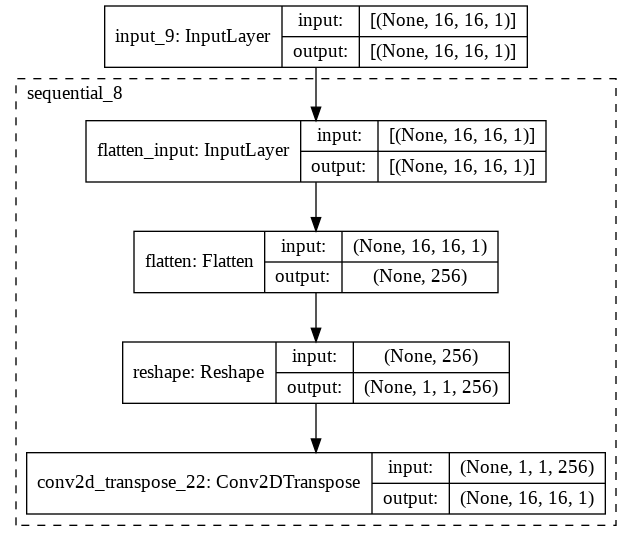

In [74]:
tf.keras.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [75]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 16, 16, 1)         65536     
Total params: 65,536
Trainable params: 65,536
Non-trainable params: 0
_________________________________________________________________


In [76]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [77]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [78]:
BATCH_SIZE = 32
BUFFER_SIZE = 100

In [79]:
def y_img(img):
  img = tf.image.resize_with_crop_or_pad(img, 16, 16)
  shifted_img = img[:, :14, ...]

  shifted_img = tf.image.resize_with_pad(shifted_img, 16, int(16*2.5))[:,int(.5*16):int(1.5*16),...]

  return img, shifted_img



In [80]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images[:BUFFER_SIZE]).map(y_img).batch(BATCH_SIZE, drop_remainder=True)

In [81]:
train_dataset

<BatchDataset shapes: ((32, 16, 16, 1), (32, 16, 16, 1)), types: (tf.float32, tf.float32)>

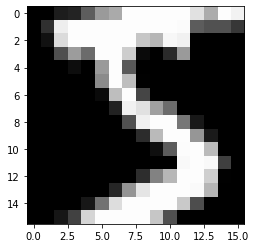

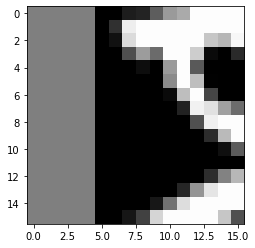

In [82]:
for train, target in train_dataset.take(1):
  plt.imshow(tf.image.grayscale_to_rgb(train[0] * 0.5 + 0.5))
  plt.show()
  plt.imshow(tf.image.grayscale_to_rgb(target[0] * 0.5 +0.5))
  plt.show()
  

In [83]:
optimizer = tf.keras.optimizers.Adam()
mae_loss = tf.keras.losses.MeanAbsoluteError()
def train_step(epochs):
  for i in range(epochs):
    for j, (train, target) in train_dataset.enumerate():
      with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        pred = model(train,training=True)
        loss = mae_loss(target, pred)
        gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print(f"epoch {i}")
    plt.subplot(1, 3, 1)
    plt.imshow(tf.image.grayscale_to_rgb(train[0]) * 0.5 + 0.5)
    plt.title('input')
    plt.subplot(1, 3, 2)
    plt.imshow(tf.image.grayscale_to_rgb(pred[0]) * 0.5 + 0.5)
    plt.title('pred')
    plt.subplot(1, 3, 3)
    plt.imshow(tf.image.grayscale_to_rgb(target[0]) * 0.5 + 0.5)
    plt.title('target')
    plt.show()
    print(loss)





epoch 0


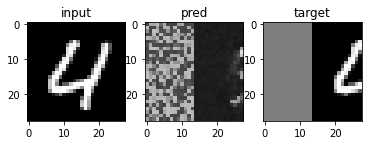

tf.Tensor(0.38211712, shape=(), dtype=float32)
epoch 1


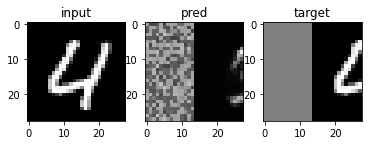

tf.Tensor(0.24649581, shape=(), dtype=float32)
epoch 2


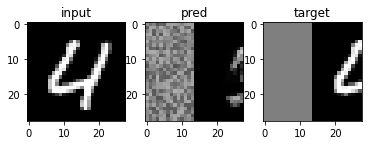

tf.Tensor(0.19395053, shape=(), dtype=float32)
epoch 3


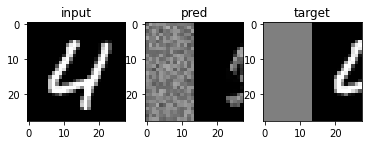

tf.Tensor(0.18847953, shape=(), dtype=float32)
epoch 4


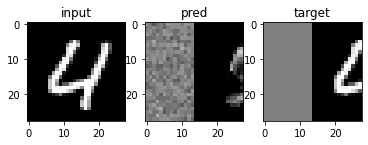

tf.Tensor(0.15005809, shape=(), dtype=float32)
epoch 5


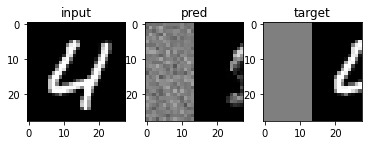

tf.Tensor(0.14893743, shape=(), dtype=float32)
epoch 6


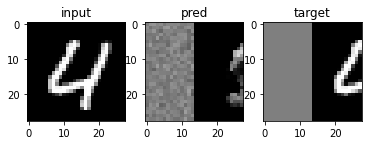

tf.Tensor(0.1361135, shape=(), dtype=float32)
epoch 7


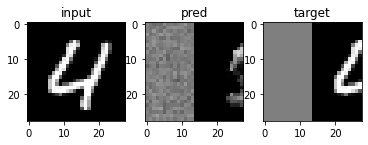

tf.Tensor(0.13297452, shape=(), dtype=float32)
epoch 8


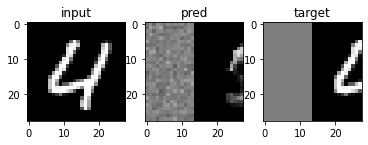

tf.Tensor(0.13190378, shape=(), dtype=float32)
epoch 9


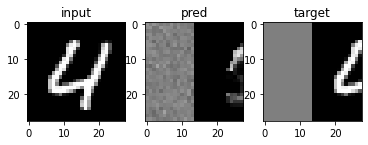

tf.Tensor(0.11762012, shape=(), dtype=float32)
epoch 10


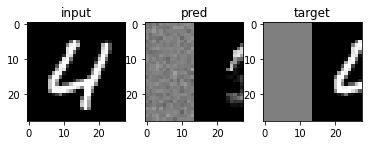

tf.Tensor(0.11728471, shape=(), dtype=float32)
epoch 11


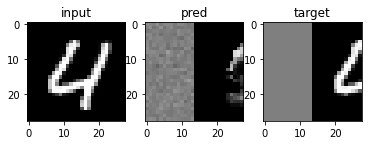

tf.Tensor(0.11052145, shape=(), dtype=float32)
epoch 12


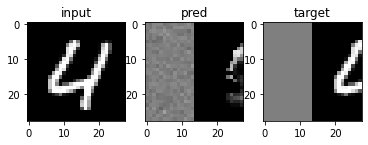

tf.Tensor(0.106415965, shape=(), dtype=float32)
epoch 13


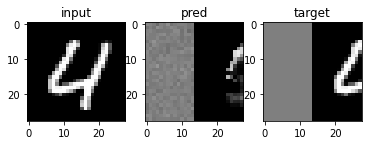

tf.Tensor(0.10265429, shape=(), dtype=float32)
epoch 14


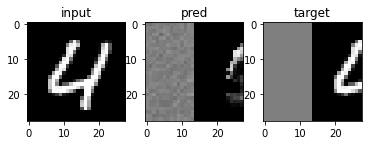

tf.Tensor(0.102045566, shape=(), dtype=float32)
epoch 15


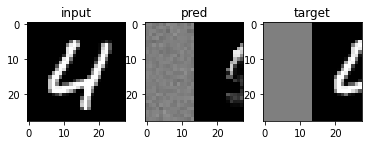

tf.Tensor(0.09831302, shape=(), dtype=float32)
epoch 16


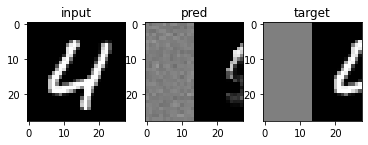

tf.Tensor(0.097426005, shape=(), dtype=float32)
epoch 17


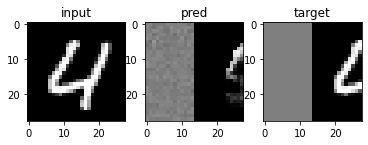

tf.Tensor(0.0959989, shape=(), dtype=float32)
epoch 18


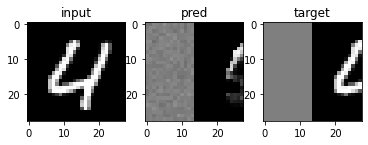

tf.Tensor(0.094430864, shape=(), dtype=float32)
epoch 19


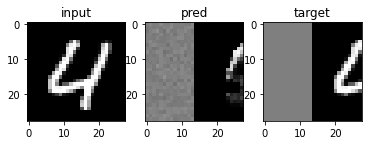

tf.Tensor(0.092244126, shape=(), dtype=float32)
epoch 20


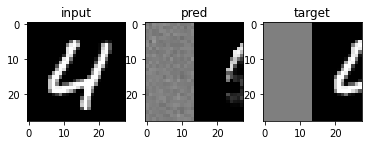

tf.Tensor(0.09207992, shape=(), dtype=float32)
epoch 21


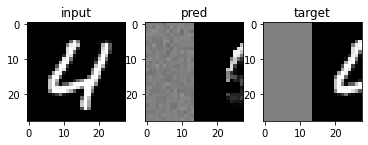

tf.Tensor(0.09109423, shape=(), dtype=float32)
epoch 22


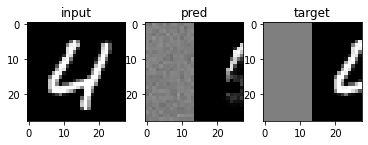

tf.Tensor(0.09051657, shape=(), dtype=float32)
epoch 23


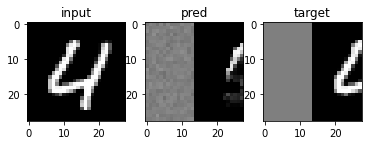

tf.Tensor(0.08898596, shape=(), dtype=float32)
epoch 24


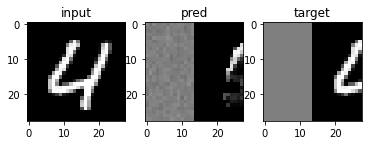

tf.Tensor(0.08780822, shape=(), dtype=float32)
epoch 25


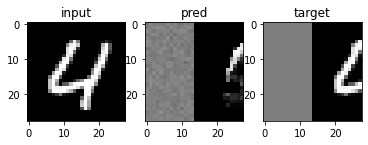

tf.Tensor(0.08749101, shape=(), dtype=float32)
epoch 26


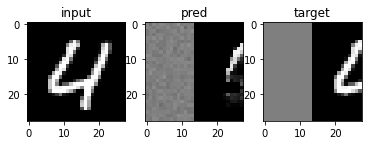

tf.Tensor(0.08683265, shape=(), dtype=float32)
epoch 27


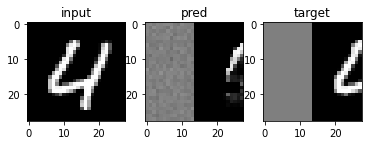

tf.Tensor(0.08499282, shape=(), dtype=float32)
epoch 28


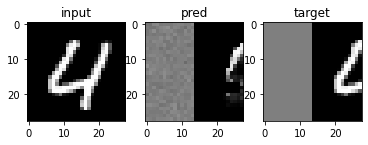

tf.Tensor(0.08453127, shape=(), dtype=float32)
epoch 29


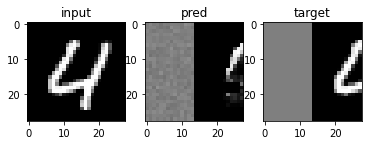

tf.Tensor(0.083953544, shape=(), dtype=float32)
epoch 30


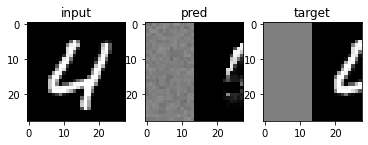

tf.Tensor(0.08311886, shape=(), dtype=float32)
epoch 31


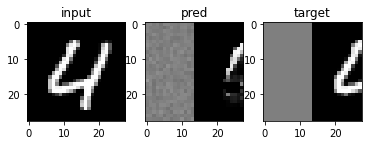

tf.Tensor(0.08259773, shape=(), dtype=float32)
epoch 32


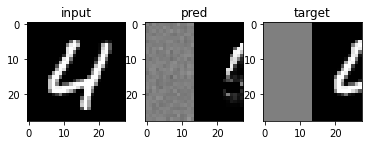

tf.Tensor(0.08182757, shape=(), dtype=float32)
epoch 33


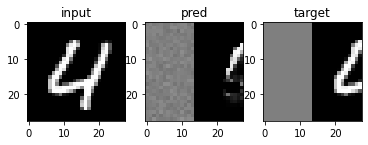

tf.Tensor(0.08189359, shape=(), dtype=float32)
epoch 34


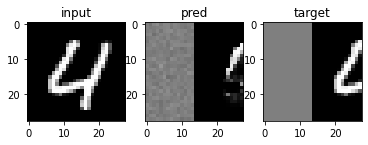

tf.Tensor(0.08094854, shape=(), dtype=float32)
epoch 35


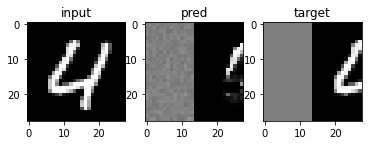

tf.Tensor(0.08114942, shape=(), dtype=float32)
epoch 36


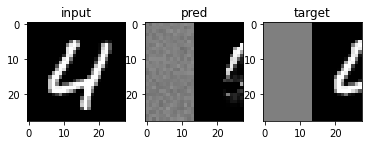

tf.Tensor(0.079683304, shape=(), dtype=float32)
epoch 37


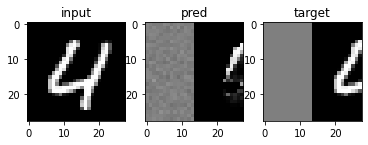

tf.Tensor(0.079634964, shape=(), dtype=float32)
epoch 38


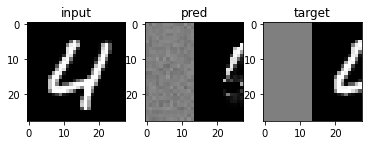

tf.Tensor(0.07950214, shape=(), dtype=float32)
epoch 39


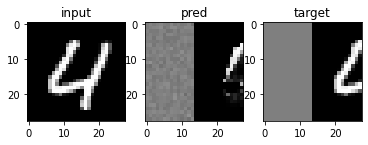

tf.Tensor(0.07920004, shape=(), dtype=float32)
epoch 40


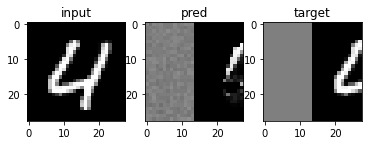

tf.Tensor(0.07789253, shape=(), dtype=float32)
epoch 41


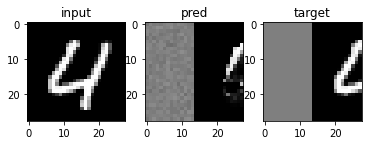

tf.Tensor(0.07774037, shape=(), dtype=float32)
epoch 42


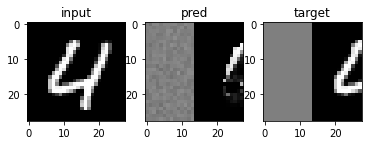

tf.Tensor(0.076649204, shape=(), dtype=float32)
epoch 43


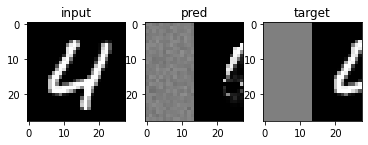

tf.Tensor(0.07671257, shape=(), dtype=float32)
epoch 44


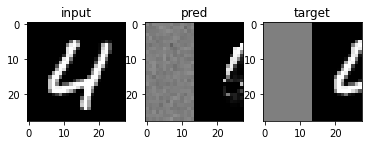

tf.Tensor(0.07547535, shape=(), dtype=float32)
epoch 45


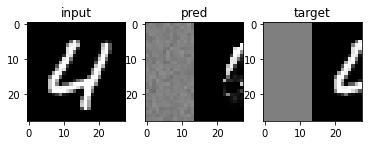

tf.Tensor(0.075215586, shape=(), dtype=float32)
epoch 46


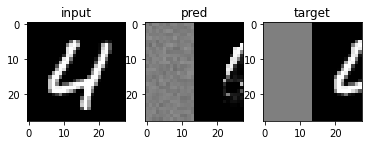

tf.Tensor(0.07506876, shape=(), dtype=float32)
epoch 47


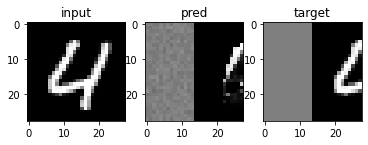

tf.Tensor(0.07467564, shape=(), dtype=float32)
epoch 48


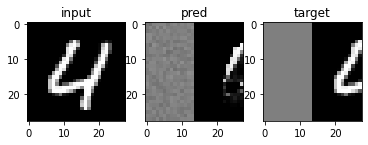

tf.Tensor(0.07417171, shape=(), dtype=float32)
epoch 49


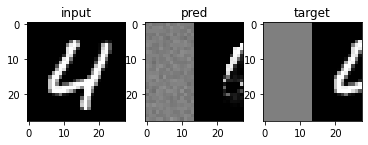

tf.Tensor(0.07326408, shape=(), dtype=float32)
epoch 50


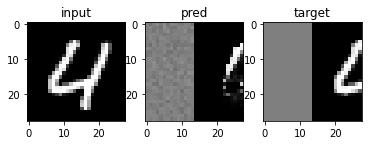

tf.Tensor(0.07265069, shape=(), dtype=float32)
epoch 51


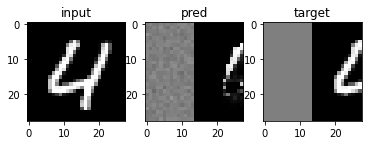

tf.Tensor(0.07341219, shape=(), dtype=float32)
epoch 52


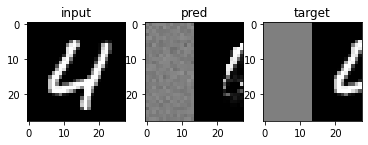

tf.Tensor(0.07206935, shape=(), dtype=float32)
epoch 53


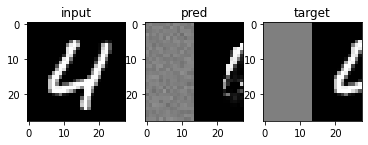

tf.Tensor(0.07167204, shape=(), dtype=float32)
epoch 54


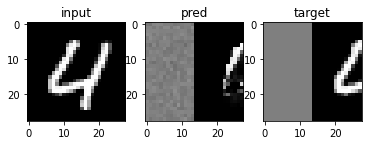

tf.Tensor(0.07152377, shape=(), dtype=float32)
epoch 55


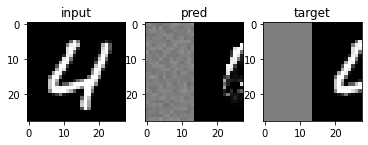

tf.Tensor(0.07056824, shape=(), dtype=float32)
epoch 56


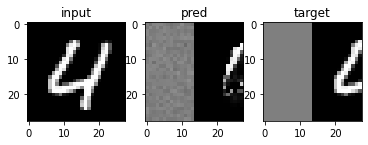

tf.Tensor(0.06943109, shape=(), dtype=float32)
epoch 57


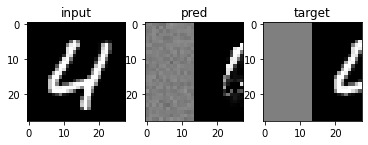

tf.Tensor(0.07022351, shape=(), dtype=float32)
epoch 58


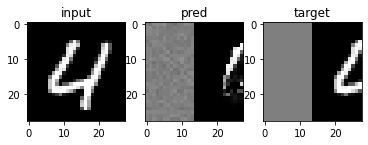

tf.Tensor(0.06874743, shape=(), dtype=float32)
epoch 59


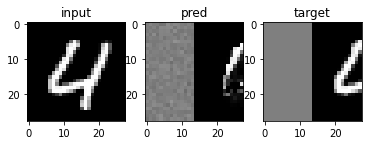

tf.Tensor(0.06904787, shape=(), dtype=float32)
epoch 60


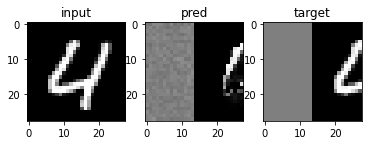

tf.Tensor(0.0686746, shape=(), dtype=float32)
epoch 61


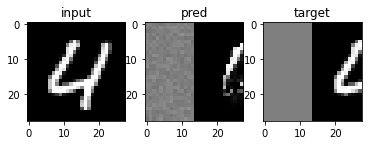

tf.Tensor(0.06765724, shape=(), dtype=float32)
epoch 62


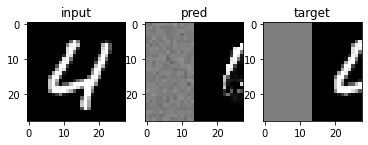

tf.Tensor(0.067967914, shape=(), dtype=float32)
epoch 63


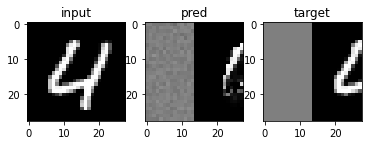

tf.Tensor(0.06674144, shape=(), dtype=float32)
epoch 64


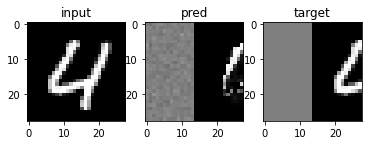

tf.Tensor(0.0668087, shape=(), dtype=float32)
epoch 65


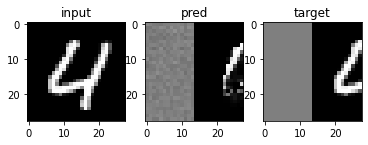

tf.Tensor(0.06643729, shape=(), dtype=float32)
epoch 66


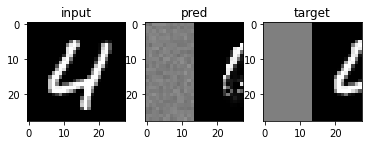

tf.Tensor(0.06589562, shape=(), dtype=float32)
epoch 67


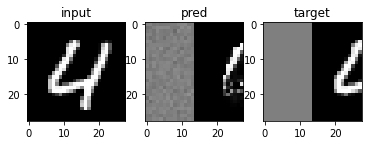

tf.Tensor(0.06651495, shape=(), dtype=float32)
epoch 68


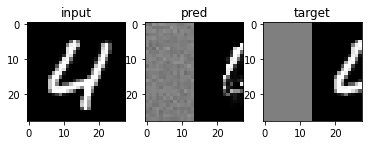

tf.Tensor(0.06622973, shape=(), dtype=float32)
epoch 69


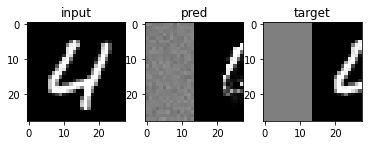

tf.Tensor(0.06449051, shape=(), dtype=float32)
epoch 70


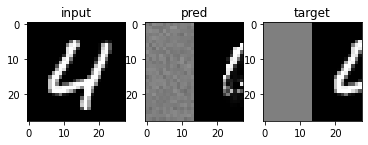

tf.Tensor(0.0641585, shape=(), dtype=float32)
epoch 71


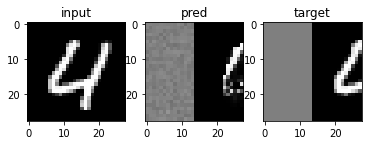

tf.Tensor(0.06392804, shape=(), dtype=float32)
epoch 72


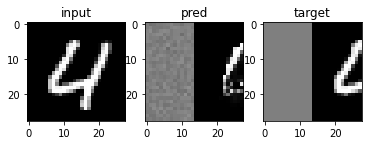

tf.Tensor(0.06443726, shape=(), dtype=float32)
epoch 73


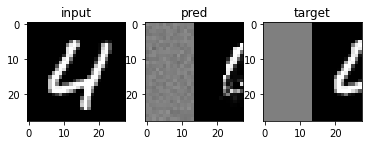

tf.Tensor(0.06301746, shape=(), dtype=float32)
epoch 74


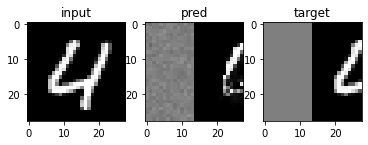

tf.Tensor(0.061534297, shape=(), dtype=float32)
epoch 75


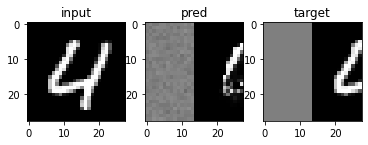

tf.Tensor(0.061127126, shape=(), dtype=float32)
epoch 76


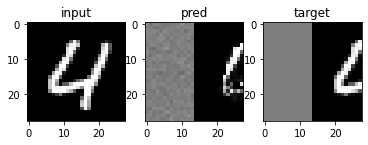

tf.Tensor(0.061017025, shape=(), dtype=float32)
epoch 77


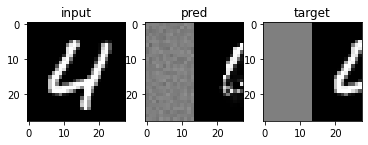

tf.Tensor(0.06119215, shape=(), dtype=float32)
epoch 78


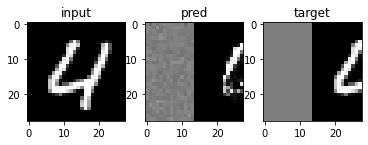

tf.Tensor(0.059902385, shape=(), dtype=float32)
epoch 79


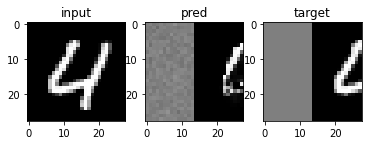

tf.Tensor(0.059709802, shape=(), dtype=float32)
epoch 80


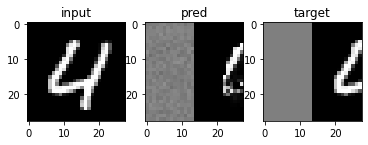

tf.Tensor(0.05966832, shape=(), dtype=float32)
epoch 81


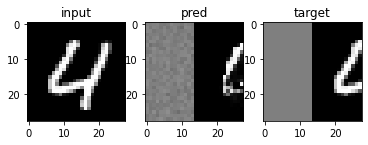

tf.Tensor(0.060374673, shape=(), dtype=float32)
epoch 82


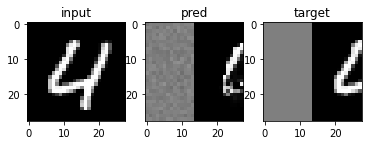

tf.Tensor(0.059906974, shape=(), dtype=float32)
epoch 83


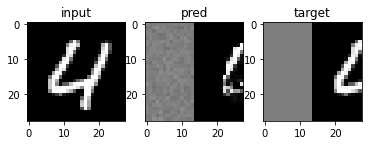

tf.Tensor(0.058285665, shape=(), dtype=float32)
epoch 84


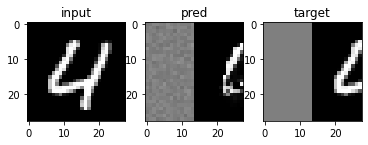

tf.Tensor(0.058594063, shape=(), dtype=float32)
epoch 85


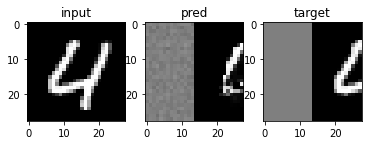

tf.Tensor(0.057881642, shape=(), dtype=float32)
epoch 86


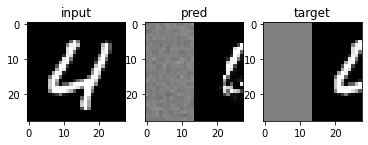

tf.Tensor(0.056691743, shape=(), dtype=float32)
epoch 87


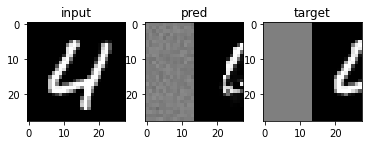

tf.Tensor(0.05658279, shape=(), dtype=float32)
epoch 88


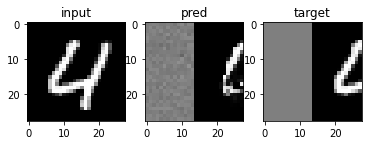

tf.Tensor(0.05644415, shape=(), dtype=float32)
epoch 89


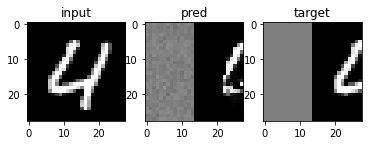

tf.Tensor(0.056270212, shape=(), dtype=float32)
epoch 90


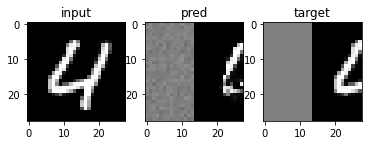

tf.Tensor(0.056320418, shape=(), dtype=float32)
epoch 91


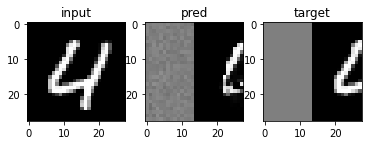

tf.Tensor(0.055255145, shape=(), dtype=float32)
epoch 92


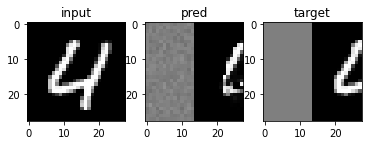

tf.Tensor(0.05482489, shape=(), dtype=float32)
epoch 93


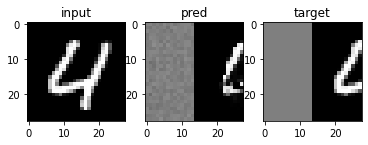

tf.Tensor(0.054140706, shape=(), dtype=float32)
epoch 94


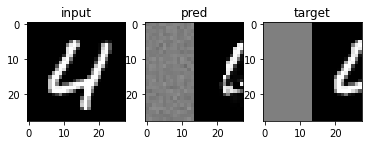

tf.Tensor(0.054808494, shape=(), dtype=float32)
epoch 95


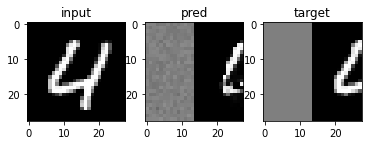

tf.Tensor(0.054966412, shape=(), dtype=float32)
epoch 96


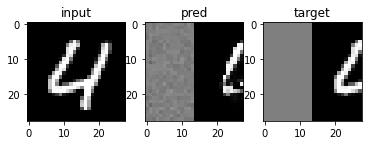

tf.Tensor(0.05493821, shape=(), dtype=float32)
epoch 97


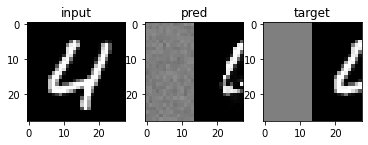

tf.Tensor(0.054377127, shape=(), dtype=float32)
epoch 98


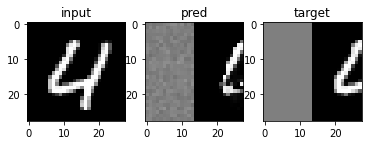

tf.Tensor(0.05586373, shape=(), dtype=float32)


KeyboardInterrupt: ignored

In [ ]:
train_step(500)

In [84]:
import tensorflow as tf
def model2():
  inp = tf.keras.layers.Input([16,16, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 16*16*1]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu"),
            tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            #tf.keras.layers.Conv2D(filters=1024, kernel_size=(4,4), padding="same", activation=tf.nn.leaky_relu),
          tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(16), strides=(16, 16), padding="same", activation=tf.nn.tanh, use_bias=False),
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = model2()
          


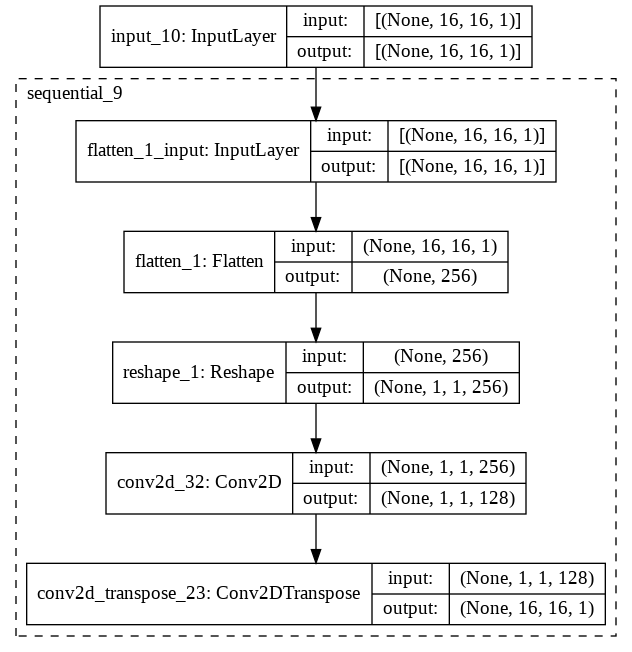

In [86]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

epoch 0


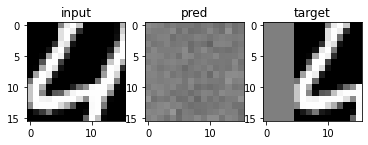

tf.Tensor(0.58683413, shape=(), dtype=float32)
epoch 1


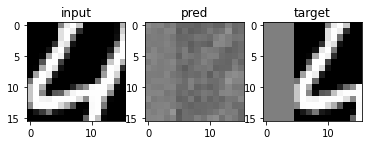

tf.Tensor(0.5386376, shape=(), dtype=float32)
epoch 2


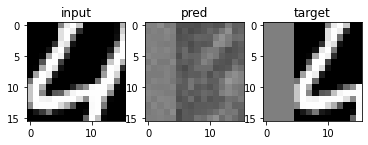

tf.Tensor(0.47894135, shape=(), dtype=float32)
epoch 3


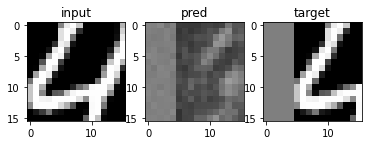

tf.Tensor(0.42146075, shape=(), dtype=float32)
epoch 4


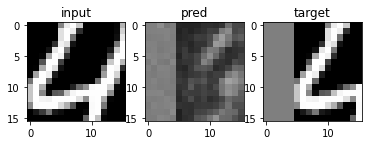

tf.Tensor(0.38160682, shape=(), dtype=float32)
epoch 5


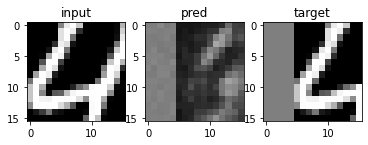

tf.Tensor(0.35535753, shape=(), dtype=float32)
epoch 6


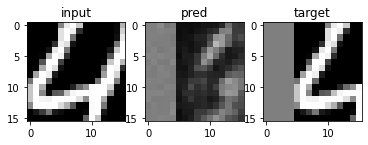

tf.Tensor(0.3318716, shape=(), dtype=float32)
epoch 7


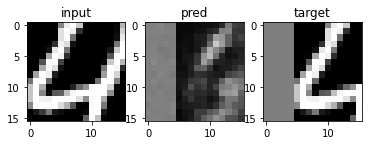

tf.Tensor(0.30831534, shape=(), dtype=float32)
epoch 8


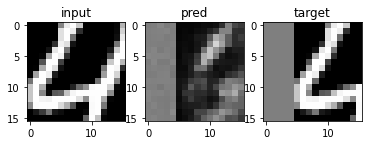

tf.Tensor(0.2867056, shape=(), dtype=float32)
epoch 9


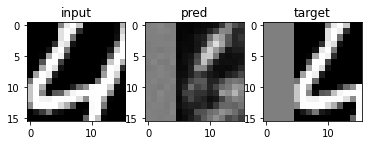

tf.Tensor(0.26661313, shape=(), dtype=float32)
epoch 10


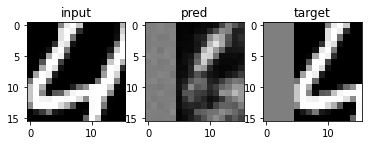

tf.Tensor(0.24991554, shape=(), dtype=float32)
epoch 11


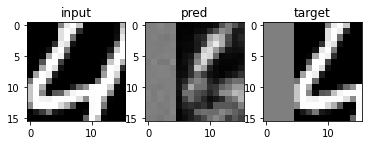

tf.Tensor(0.23566107, shape=(), dtype=float32)
epoch 12


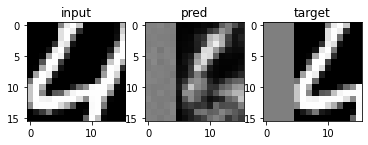

tf.Tensor(0.2237958, shape=(), dtype=float32)
epoch 13


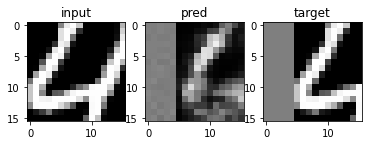

tf.Tensor(0.21252006, shape=(), dtype=float32)
epoch 14


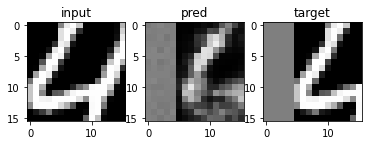

tf.Tensor(0.20313305, shape=(), dtype=float32)
epoch 15


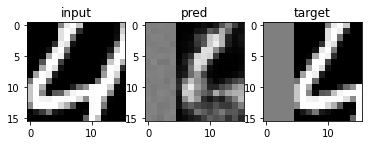

tf.Tensor(0.19504477, shape=(), dtype=float32)
epoch 16


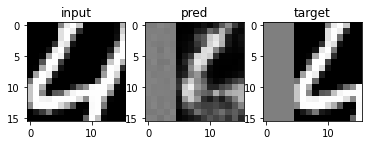

tf.Tensor(0.1874556, shape=(), dtype=float32)
epoch 17


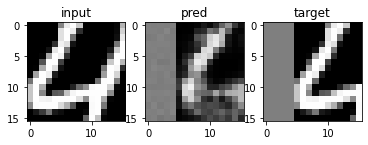

tf.Tensor(0.17999056, shape=(), dtype=float32)
epoch 18


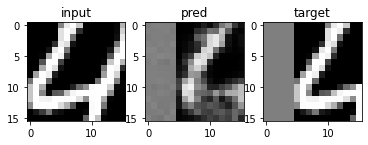

tf.Tensor(0.17274295, shape=(), dtype=float32)
epoch 19


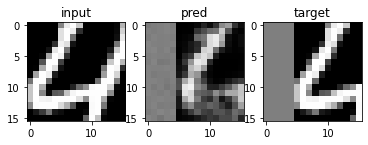

tf.Tensor(0.16696705, shape=(), dtype=float32)
epoch 20


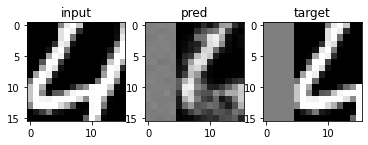

tf.Tensor(0.16099057, shape=(), dtype=float32)
epoch 21


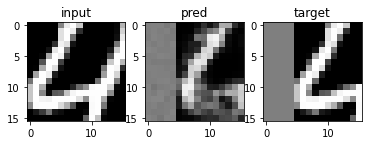

tf.Tensor(0.15534975, shape=(), dtype=float32)
epoch 22


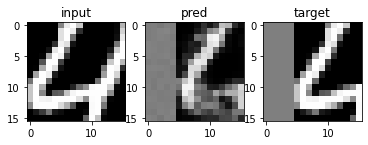

tf.Tensor(0.14992513, shape=(), dtype=float32)
epoch 23


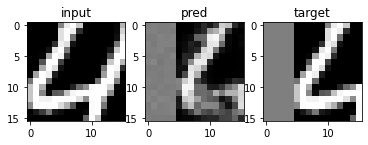

tf.Tensor(0.14494812, shape=(), dtype=float32)
epoch 24


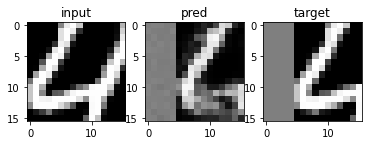

tf.Tensor(0.1397937, shape=(), dtype=float32)
epoch 25


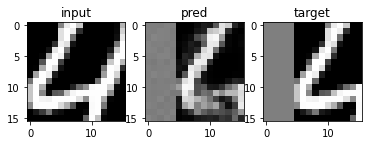

tf.Tensor(0.13475293, shape=(), dtype=float32)
epoch 26


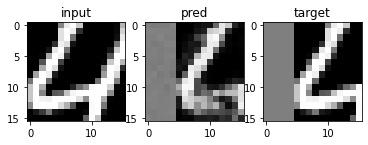

tf.Tensor(0.13010693, shape=(), dtype=float32)
epoch 27


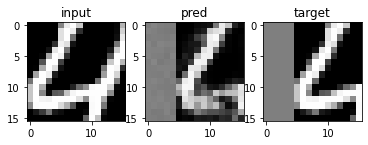

tf.Tensor(0.12595253, shape=(), dtype=float32)
epoch 28


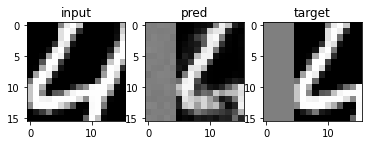

tf.Tensor(0.12193039, shape=(), dtype=float32)
epoch 29


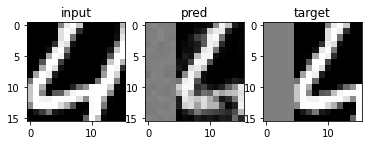

tf.Tensor(0.11798315, shape=(), dtype=float32)
epoch 30


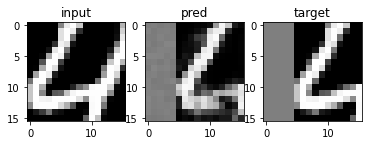

tf.Tensor(0.11452752, shape=(), dtype=float32)
epoch 31


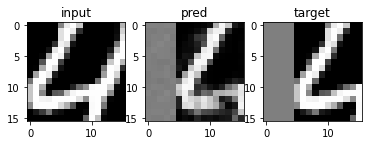

tf.Tensor(0.110493764, shape=(), dtype=float32)
epoch 32


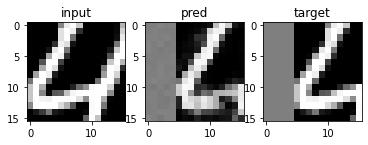

tf.Tensor(0.10712789, shape=(), dtype=float32)
epoch 33


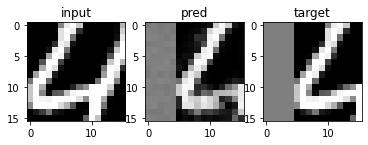

tf.Tensor(0.10436769, shape=(), dtype=float32)
epoch 34


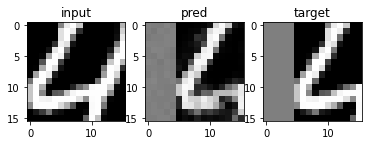

tf.Tensor(0.10135125, shape=(), dtype=float32)
epoch 35


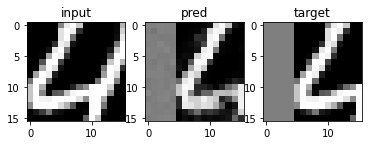

tf.Tensor(0.09813997, shape=(), dtype=float32)
epoch 36


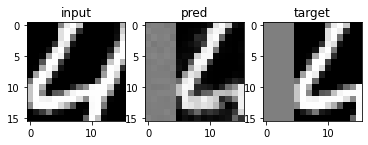

tf.Tensor(0.09516229, shape=(), dtype=float32)
epoch 37


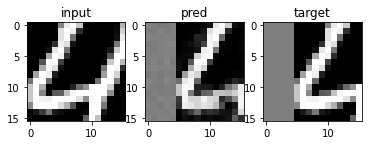

tf.Tensor(0.092953995, shape=(), dtype=float32)
epoch 38


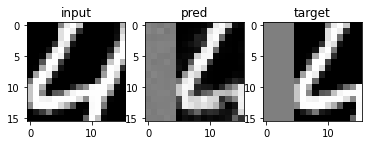

tf.Tensor(0.08962442, shape=(), dtype=float32)
epoch 39


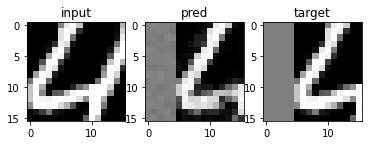

tf.Tensor(0.08786085, shape=(), dtype=float32)
epoch 40


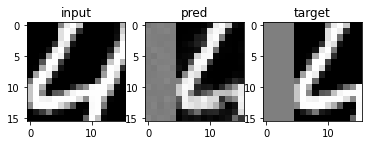

tf.Tensor(0.08549039, shape=(), dtype=float32)
epoch 41


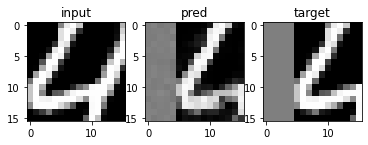

tf.Tensor(0.08336889, shape=(), dtype=float32)
epoch 42


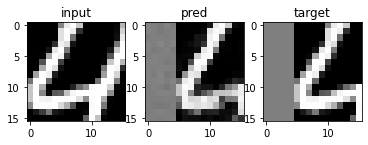

tf.Tensor(0.08108424, shape=(), dtype=float32)
epoch 43


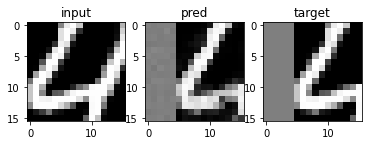

tf.Tensor(0.07893145, shape=(), dtype=float32)
epoch 44


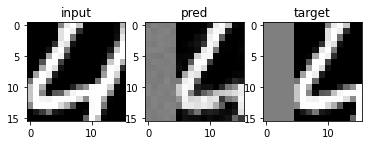

tf.Tensor(0.07825153, shape=(), dtype=float32)
epoch 45


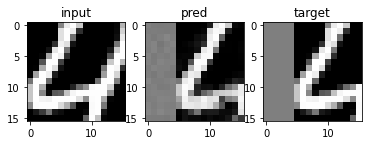

tf.Tensor(0.07633992, shape=(), dtype=float32)
epoch 46


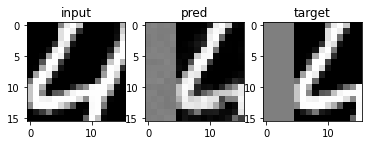

tf.Tensor(0.074174255, shape=(), dtype=float32)
epoch 47


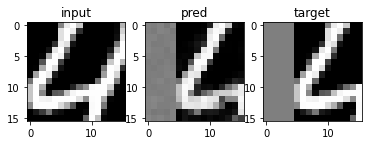

tf.Tensor(0.072971866, shape=(), dtype=float32)
epoch 48


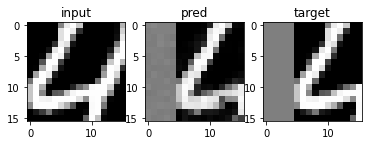

tf.Tensor(0.07100413, shape=(), dtype=float32)
epoch 49


KeyboardInterrupt: ignored

In [87]:
train_step(100)

In [92]:
import tensorflow as tf
def model_autoencoder():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#16
                                tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2D(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2DTranspose(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2DTranspose(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2DTranspose(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2DTranspose(1, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.tanh ) #16
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = model_autoencoder()
          


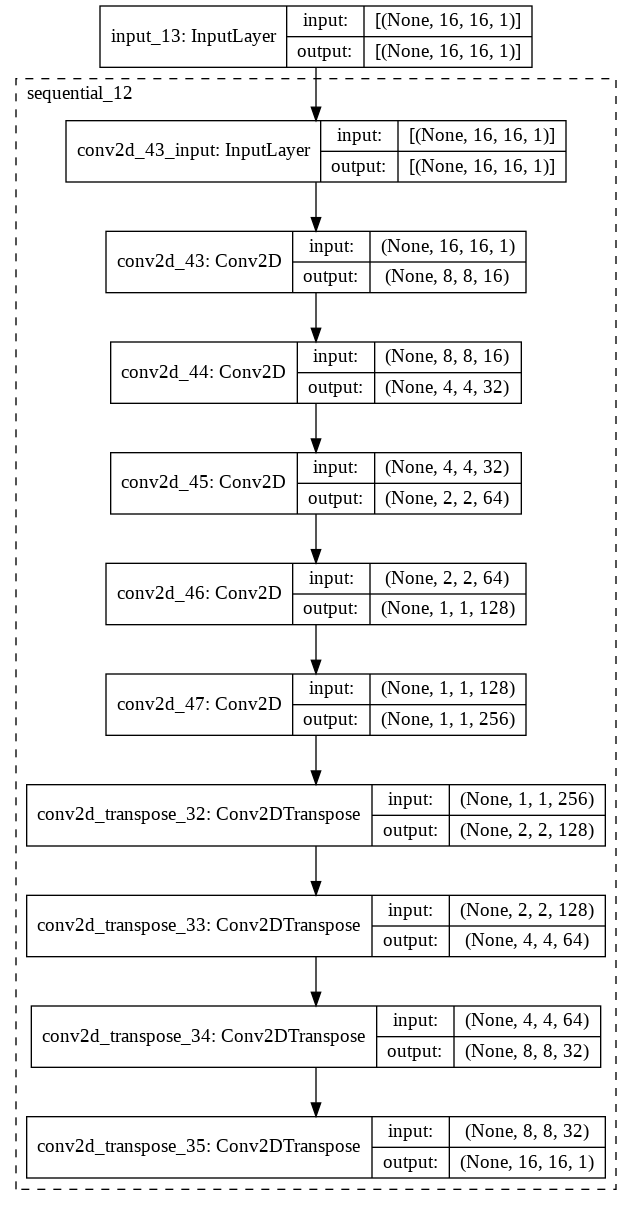

In [93]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

epoch 0


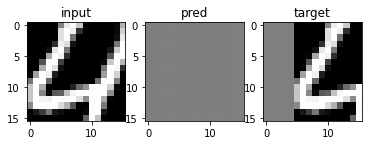

tf.Tensor(0.5958315, shape=(), dtype=float32)
epoch 1


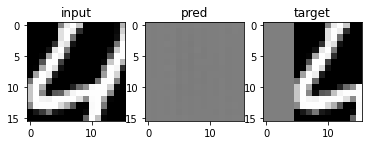

tf.Tensor(0.59299326, shape=(), dtype=float32)
epoch 2


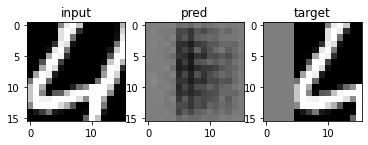

tf.Tensor(0.5069494, shape=(), dtype=float32)
epoch 3


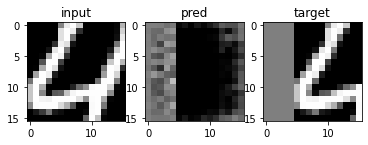

tf.Tensor(0.49134338, shape=(), dtype=float32)
epoch 4


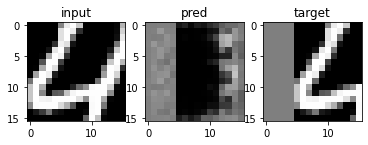

tf.Tensor(0.46513164, shape=(), dtype=float32)
epoch 5


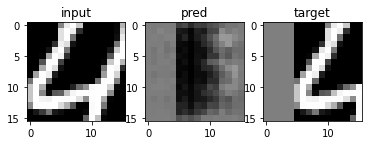

tf.Tensor(0.45816928, shape=(), dtype=float32)
epoch 6


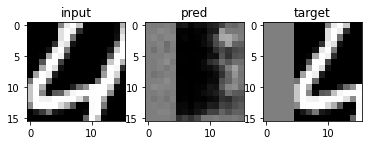

tf.Tensor(0.44485828, shape=(), dtype=float32)
epoch 7


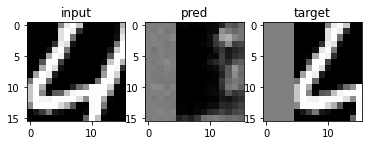

tf.Tensor(0.43801358, shape=(), dtype=float32)
epoch 8


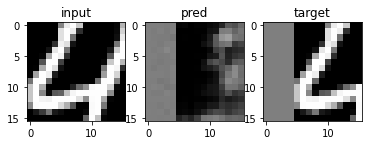

tf.Tensor(0.43058434, shape=(), dtype=float32)
epoch 9


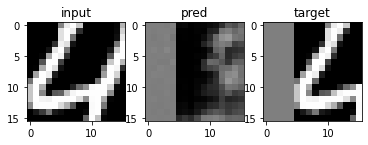

tf.Tensor(0.42861015, shape=(), dtype=float32)
epoch 10


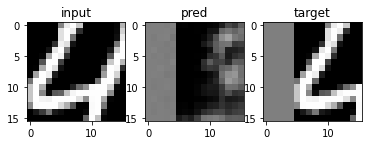

tf.Tensor(0.42429268, shape=(), dtype=float32)
epoch 11


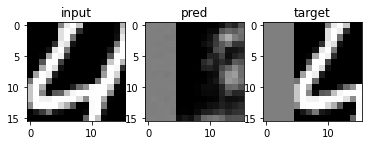

tf.Tensor(0.42115015, shape=(), dtype=float32)
epoch 12


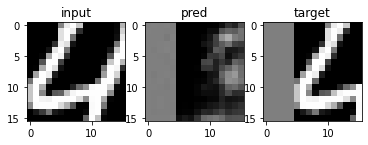

tf.Tensor(0.4169826, shape=(), dtype=float32)
epoch 13


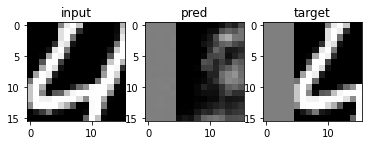

tf.Tensor(0.4126118, shape=(), dtype=float32)
epoch 14


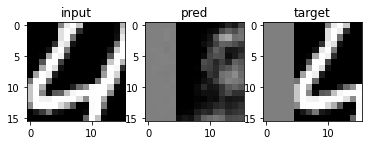

tf.Tensor(0.40883768, shape=(), dtype=float32)
epoch 15


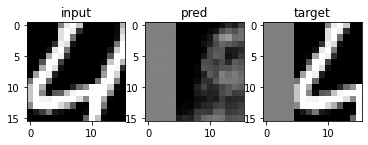

tf.Tensor(0.4004843, shape=(), dtype=float32)
epoch 16


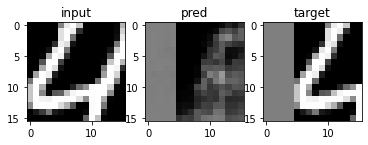

tf.Tensor(0.3878647, shape=(), dtype=float32)
epoch 17


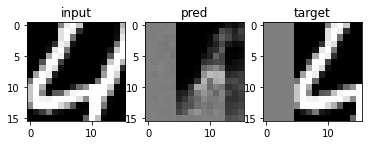

tf.Tensor(0.3742899, shape=(), dtype=float32)
epoch 18


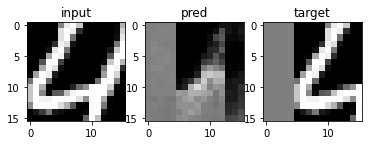

tf.Tensor(0.3633949, shape=(), dtype=float32)
epoch 19


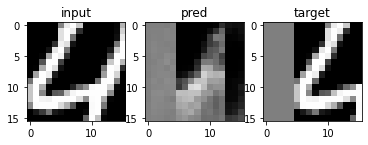

tf.Tensor(0.34686434, shape=(), dtype=float32)
epoch 20


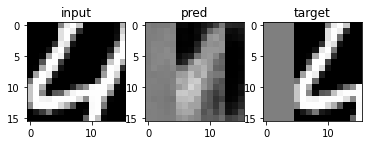

tf.Tensor(0.33339784, shape=(), dtype=float32)
epoch 21


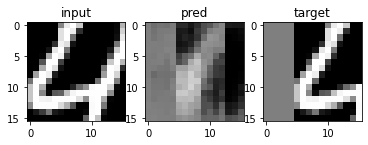

tf.Tensor(0.31991392, shape=(), dtype=float32)
epoch 22


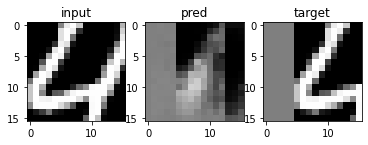

tf.Tensor(0.30687279, shape=(), dtype=float32)
epoch 23


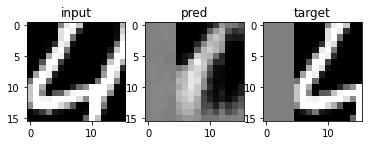

tf.Tensor(0.29553598, shape=(), dtype=float32)
epoch 24


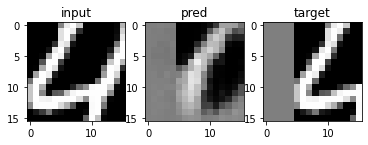

tf.Tensor(0.2853327, shape=(), dtype=float32)
epoch 25


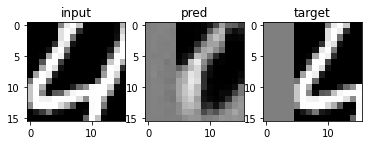

tf.Tensor(0.27413774, shape=(), dtype=float32)
epoch 26


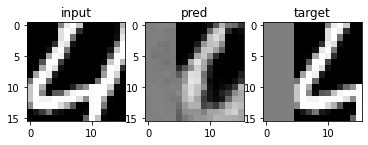

tf.Tensor(0.2619933, shape=(), dtype=float32)
epoch 27


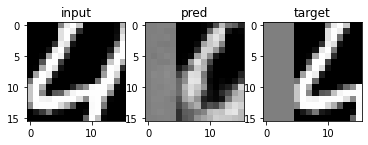

tf.Tensor(0.2541088, shape=(), dtype=float32)
epoch 28


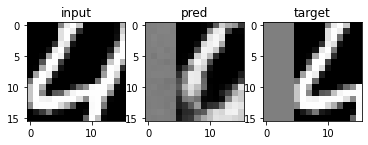

tf.Tensor(0.24808791, shape=(), dtype=float32)
epoch 29


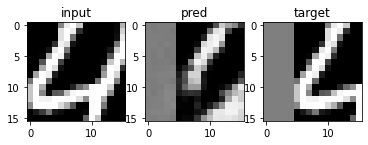

tf.Tensor(0.24398221, shape=(), dtype=float32)
epoch 30


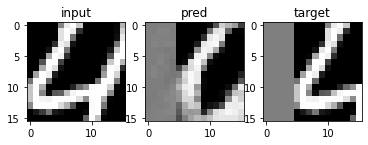

tf.Tensor(0.23447135, shape=(), dtype=float32)
epoch 31


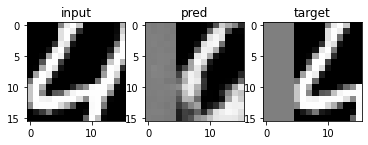

tf.Tensor(0.22387779, shape=(), dtype=float32)
epoch 32


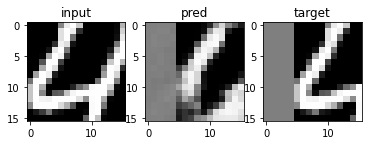

tf.Tensor(0.21569017, shape=(), dtype=float32)
epoch 33


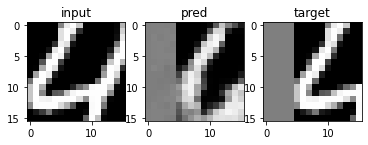

tf.Tensor(0.20966412, shape=(), dtype=float32)
epoch 34


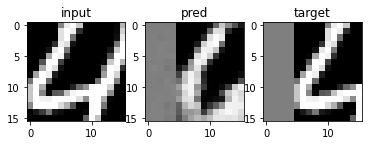

tf.Tensor(0.2017914, shape=(), dtype=float32)
epoch 35


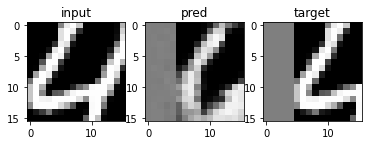

tf.Tensor(0.19686367, shape=(), dtype=float32)
epoch 36


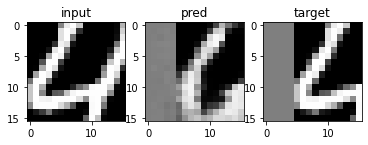

tf.Tensor(0.19243243, shape=(), dtype=float32)
epoch 37


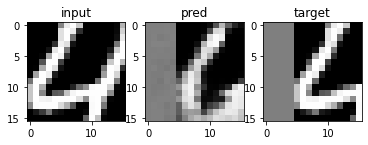

tf.Tensor(0.1851398, shape=(), dtype=float32)
epoch 38


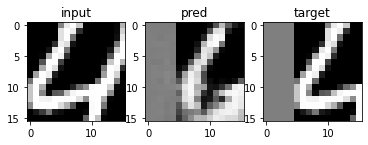

tf.Tensor(0.18314923, shape=(), dtype=float32)
epoch 39


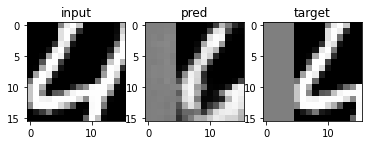

tf.Tensor(0.17897251, shape=(), dtype=float32)
epoch 40


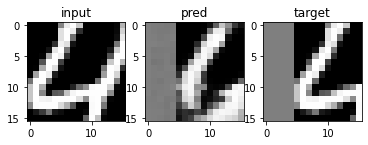

tf.Tensor(0.17632926, shape=(), dtype=float32)
epoch 41


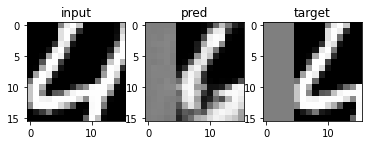

tf.Tensor(0.16719934, shape=(), dtype=float32)
epoch 42


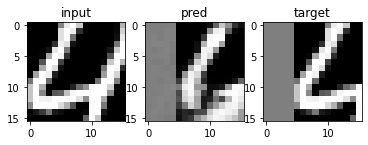

tf.Tensor(0.16169846, shape=(), dtype=float32)
epoch 43


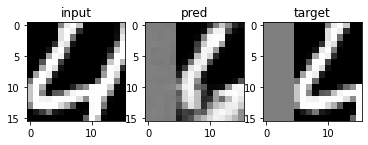

tf.Tensor(0.15746704, shape=(), dtype=float32)
epoch 44


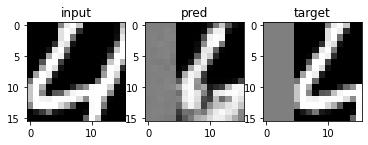

tf.Tensor(0.15457323, shape=(), dtype=float32)
epoch 45


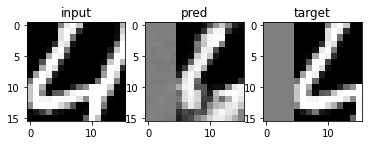

tf.Tensor(0.14946541, shape=(), dtype=float32)
epoch 46


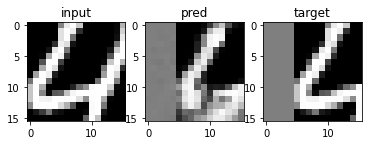

tf.Tensor(0.14573506, shape=(), dtype=float32)
epoch 47


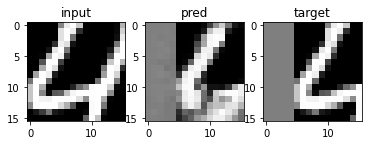

tf.Tensor(0.14400198, shape=(), dtype=float32)
epoch 48


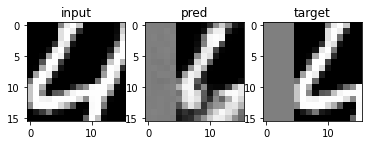

tf.Tensor(0.14280069, shape=(), dtype=float32)
epoch 49


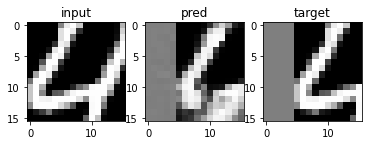

tf.Tensor(0.13863148, shape=(), dtype=float32)
epoch 50


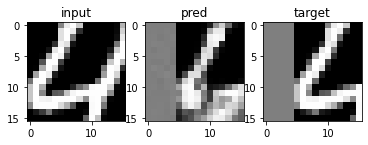

tf.Tensor(0.13601694, shape=(), dtype=float32)
epoch 51


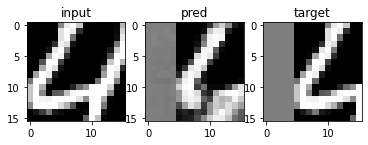

tf.Tensor(0.13065952, shape=(), dtype=float32)
epoch 52


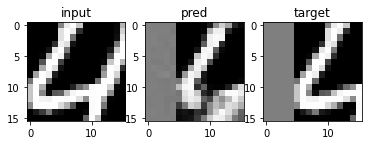

tf.Tensor(0.12966873, shape=(), dtype=float32)
epoch 53


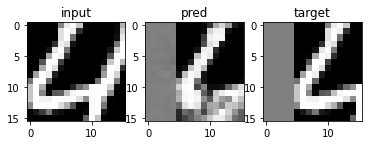

tf.Tensor(0.12748551, shape=(), dtype=float32)
epoch 54


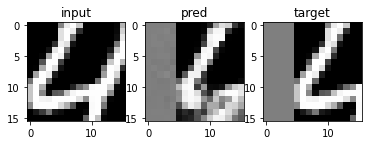

tf.Tensor(0.122062325, shape=(), dtype=float32)
epoch 55


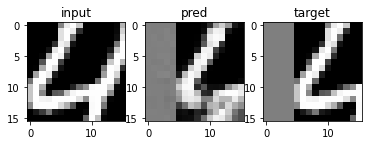

tf.Tensor(0.12248448, shape=(), dtype=float32)
epoch 56


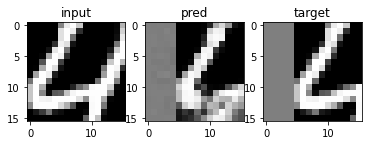

tf.Tensor(0.11994888, shape=(), dtype=float32)
epoch 57


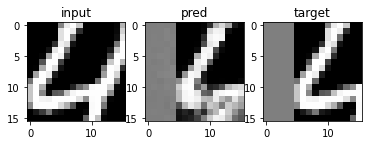

tf.Tensor(0.11770708, shape=(), dtype=float32)
epoch 58


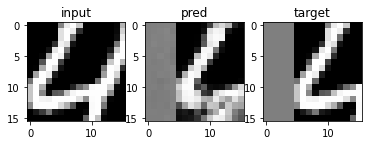

tf.Tensor(0.11408411, shape=(), dtype=float32)
epoch 59


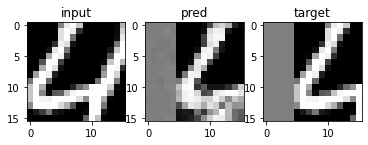

tf.Tensor(0.11235547, shape=(), dtype=float32)
epoch 60


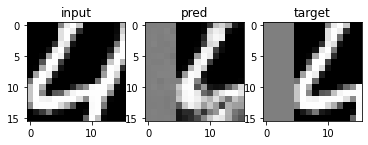

tf.Tensor(0.10971318, shape=(), dtype=float32)
epoch 61


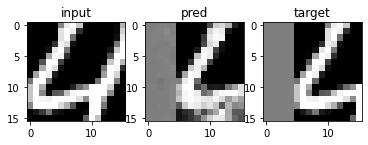

tf.Tensor(0.11063149, shape=(), dtype=float32)
epoch 62


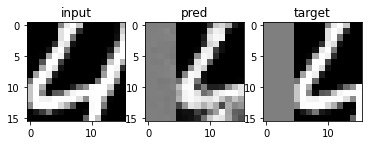

tf.Tensor(0.108601496, shape=(), dtype=float32)
epoch 63


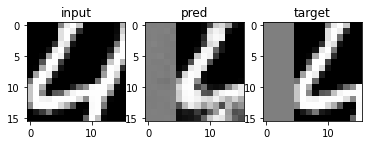

tf.Tensor(0.10916576, shape=(), dtype=float32)
epoch 64


KeyboardInterrupt: ignored

In [94]:
train_step(100)

In [95]:
import tensorflow as tf
def model_autoencoder():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#16
                                tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2D(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(512, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2DTranspose(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2DTranspose(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2DTranspose(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2DTranspose(1, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.tanh ) #16
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = model_autoencoder()
          


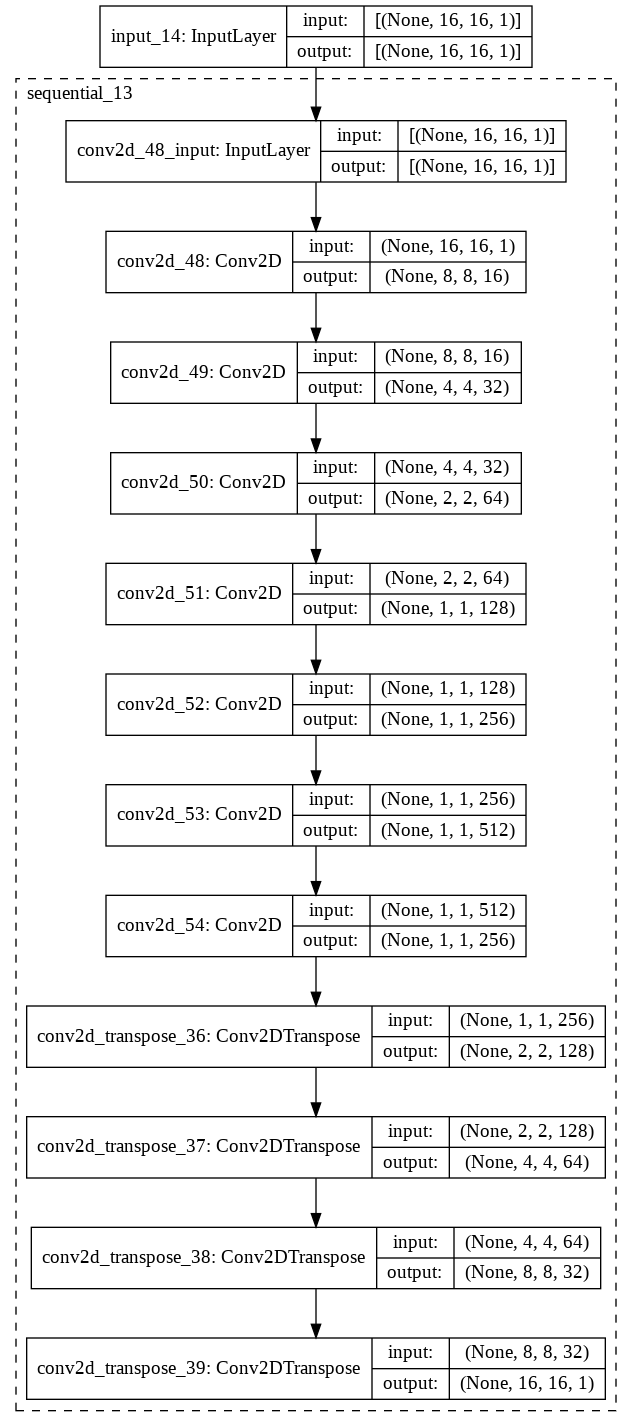

In [97]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

epoch 0


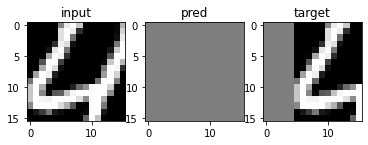

tf.Tensor(0.5958343, shape=(), dtype=float32)
epoch 1


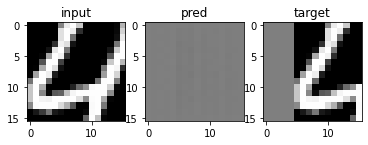

tf.Tensor(0.59281147, shape=(), dtype=float32)
epoch 2


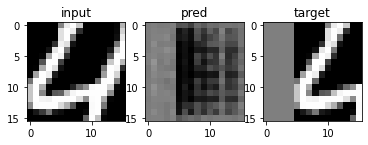

tf.Tensor(0.47145656, shape=(), dtype=float32)
epoch 3


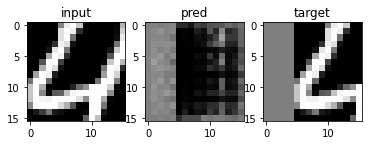

tf.Tensor(0.46563274, shape=(), dtype=float32)
epoch 4


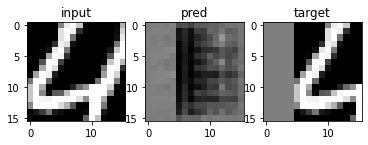

tf.Tensor(0.47051972, shape=(), dtype=float32)
epoch 5


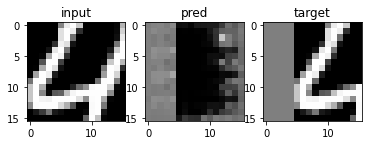

tf.Tensor(0.4546433, shape=(), dtype=float32)
epoch 6


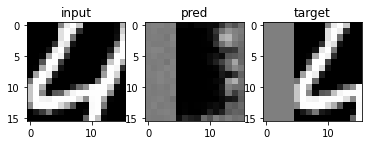

tf.Tensor(0.44525102, shape=(), dtype=float32)
epoch 7


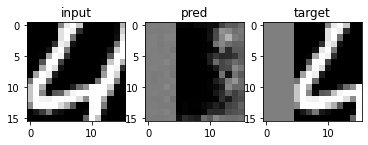

tf.Tensor(0.44044423, shape=(), dtype=float32)
epoch 8


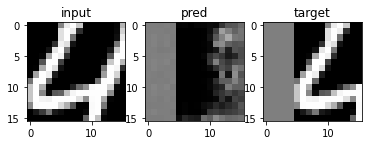

tf.Tensor(0.43505704, shape=(), dtype=float32)
epoch 9


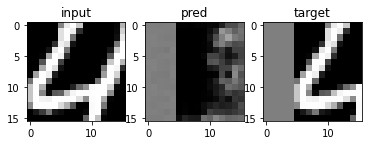

tf.Tensor(0.42967188, shape=(), dtype=float32)
epoch 10


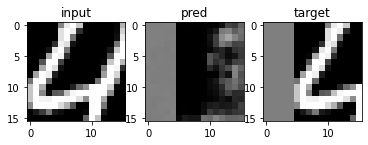

tf.Tensor(0.42404467, shape=(), dtype=float32)
epoch 11


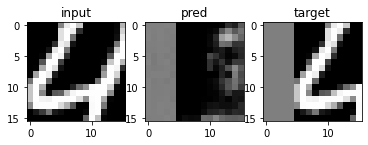

tf.Tensor(0.41696042, shape=(), dtype=float32)
epoch 12


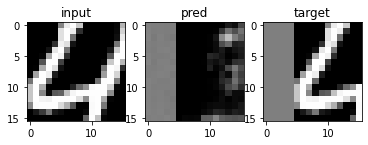

tf.Tensor(0.4114367, shape=(), dtype=float32)
epoch 13


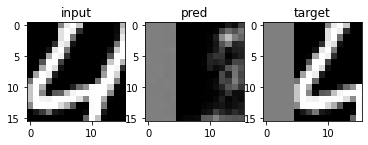

tf.Tensor(0.40487665, shape=(), dtype=float32)
epoch 14


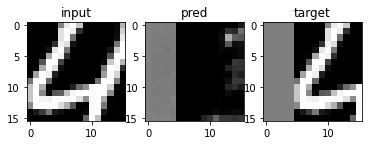

tf.Tensor(0.4003334, shape=(), dtype=float32)
epoch 15


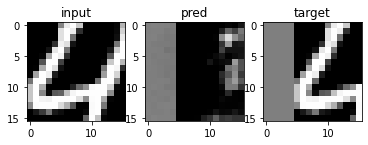

tf.Tensor(0.3958622, shape=(), dtype=float32)
epoch 16


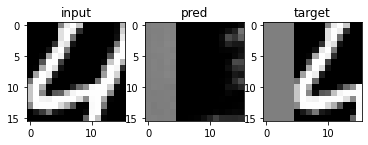

tf.Tensor(0.39095163, shape=(), dtype=float32)
epoch 17


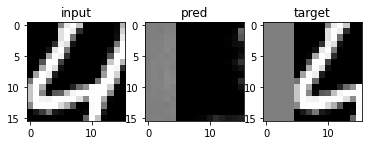

tf.Tensor(0.38154912, shape=(), dtype=float32)
epoch 18


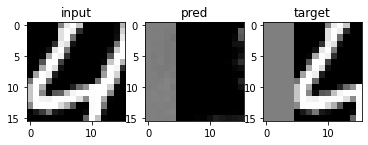

tf.Tensor(0.37269375, shape=(), dtype=float32)
epoch 19


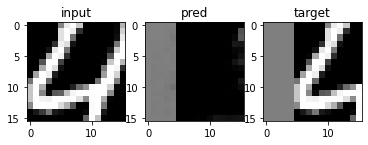

tf.Tensor(0.3646229, shape=(), dtype=float32)
epoch 20


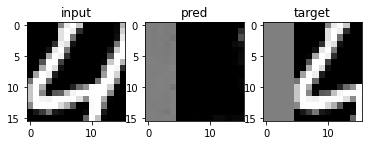

tf.Tensor(0.35375994, shape=(), dtype=float32)
epoch 21


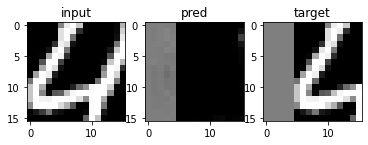

tf.Tensor(0.3413268, shape=(), dtype=float32)
epoch 22


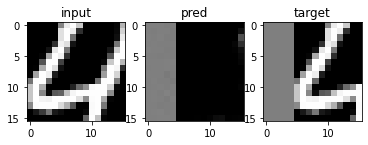

tf.Tensor(0.32945395, shape=(), dtype=float32)
epoch 23


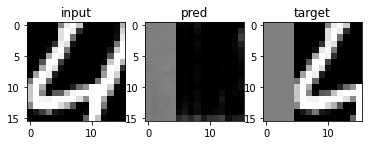

tf.Tensor(0.327488, shape=(), dtype=float32)
epoch 24


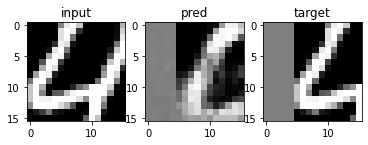

tf.Tensor(0.33657318, shape=(), dtype=float32)
epoch 25


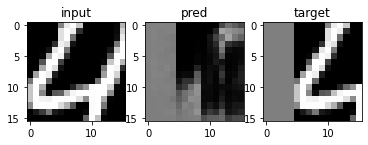

tf.Tensor(0.32637712, shape=(), dtype=float32)
epoch 26


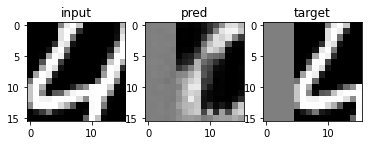

tf.Tensor(0.31760603, shape=(), dtype=float32)
epoch 27


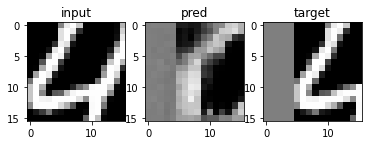

tf.Tensor(0.31511396, shape=(), dtype=float32)
epoch 28


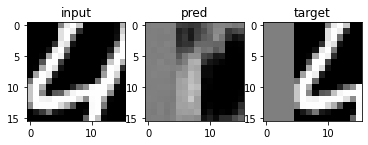

tf.Tensor(0.3178869, shape=(), dtype=float32)
epoch 29


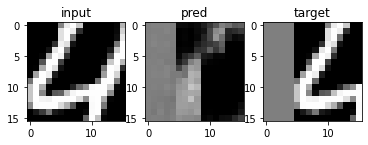

tf.Tensor(0.32053533, shape=(), dtype=float32)
epoch 30


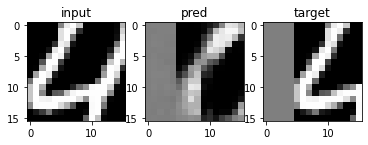

tf.Tensor(0.3294803, shape=(), dtype=float32)
epoch 31


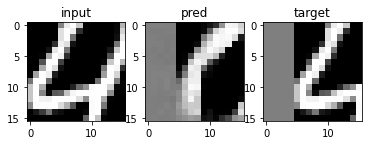

tf.Tensor(0.31488967, shape=(), dtype=float32)
epoch 32


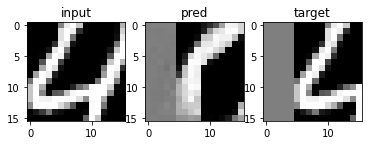

tf.Tensor(0.30946934, shape=(), dtype=float32)
epoch 33


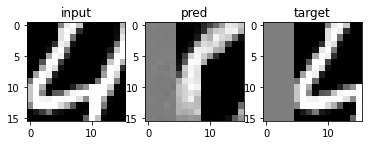

tf.Tensor(0.3091893, shape=(), dtype=float32)
epoch 34


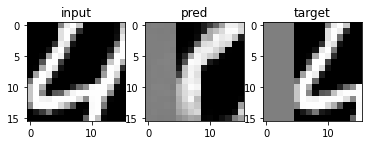

tf.Tensor(0.2998518, shape=(), dtype=float32)
epoch 35


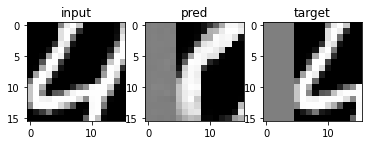

tf.Tensor(0.29765314, shape=(), dtype=float32)
epoch 36


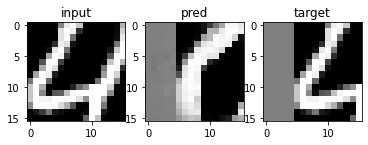

tf.Tensor(0.29112995, shape=(), dtype=float32)
epoch 37


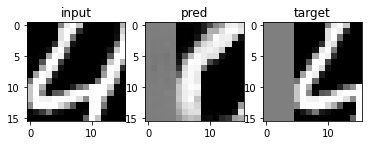

tf.Tensor(0.28972968, shape=(), dtype=float32)
epoch 38


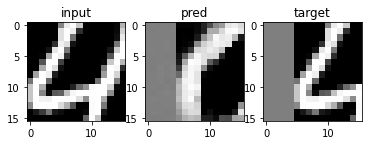

tf.Tensor(0.2914364, shape=(), dtype=float32)
epoch 39


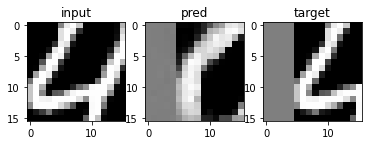

tf.Tensor(0.28575137, shape=(), dtype=float32)
epoch 40


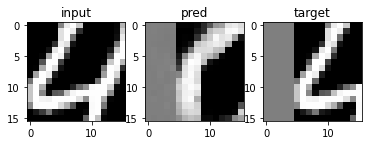

tf.Tensor(0.28218767, shape=(), dtype=float32)
epoch 41


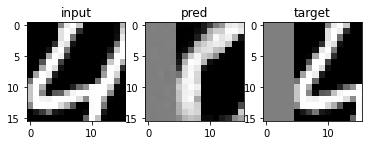

tf.Tensor(0.2778511, shape=(), dtype=float32)
epoch 42


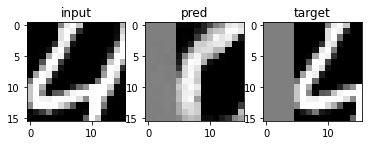

tf.Tensor(0.2741204, shape=(), dtype=float32)
epoch 43


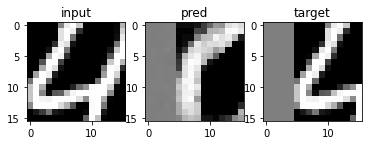

tf.Tensor(0.27352685, shape=(), dtype=float32)
epoch 44


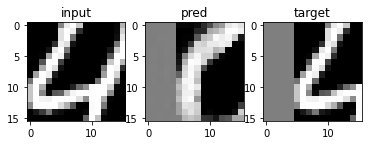

tf.Tensor(0.27237153, shape=(), dtype=float32)
epoch 45


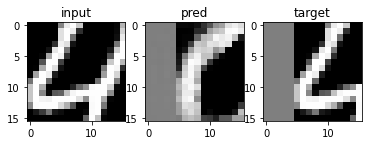

tf.Tensor(0.2701977, shape=(), dtype=float32)
epoch 46


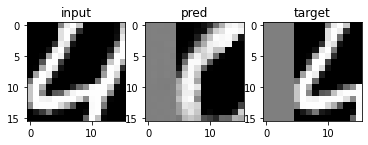

tf.Tensor(0.27000076, shape=(), dtype=float32)
epoch 47


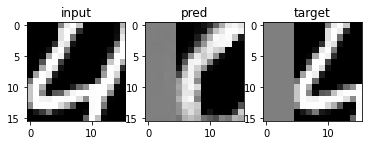

tf.Tensor(0.26526552, shape=(), dtype=float32)
epoch 48


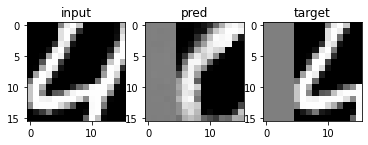

tf.Tensor(0.2638926, shape=(), dtype=float32)
epoch 49


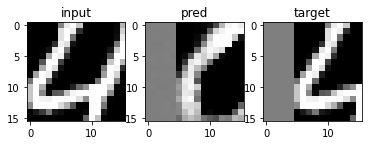

tf.Tensor(0.26093316, shape=(), dtype=float32)


In [98]:
train_step(50)

In [127]:
def seq(lyrs):
  return [tf.keras.models.Sequential(lyr) for lyr in lyrs]
import tensorflow as tf
def model_autoencoder():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = seq([tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#16
                                tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2D(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(512, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2DTranspose(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2DTranspose(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2DTranspose(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2DTranspose(1, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.tanh ) #16
          ])
  prev = inp
  skips = []
  for layer in layers[:7]:
    prev = layer(prev)
    skips.append(prev)

  skips = skips[:5]
  for skip, layer in zip(reversed(skips), layers[6:]):
    prev = tf.keras.layers.concatenate([skip, prev])
    prev = layer(prev)




  return tf.keras.Model(inputs=inp, outputs=prev)

model = model_autoencoder()

          


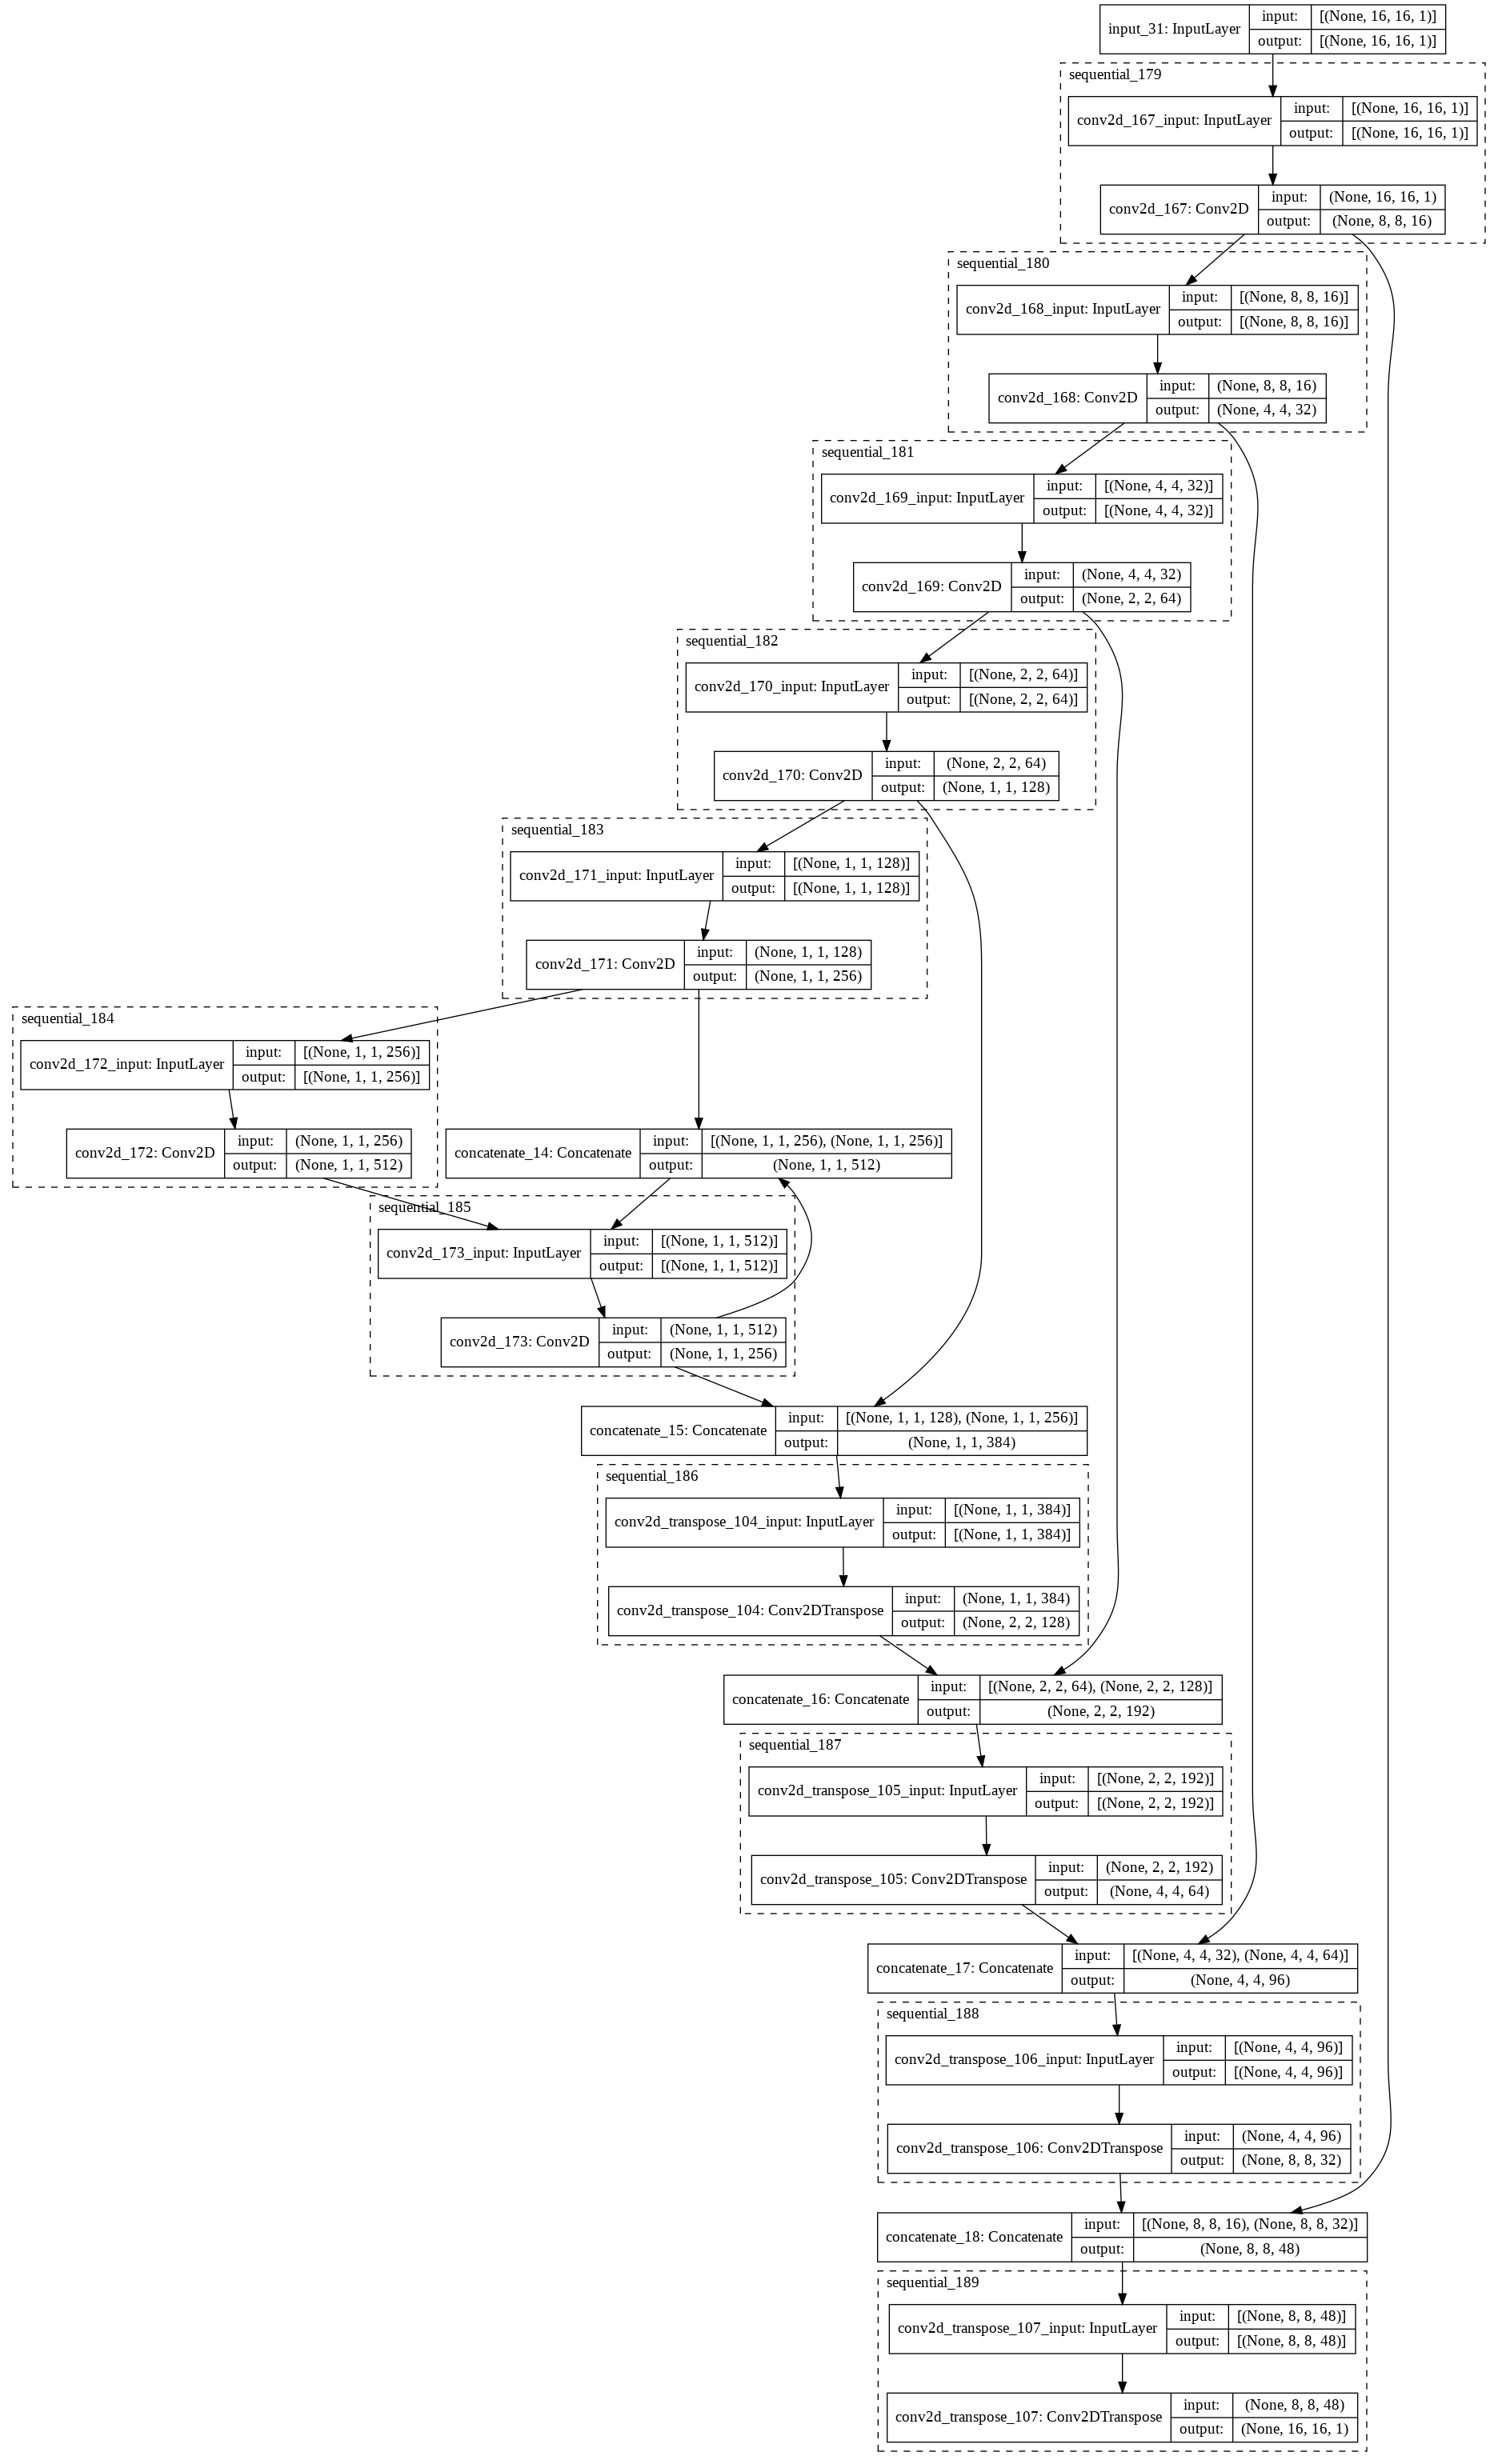

In [128]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

epoch 0


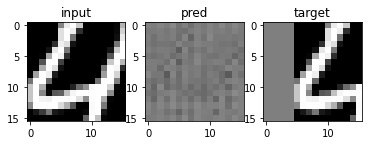

tf.Tensor(0.5918586, shape=(), dtype=float32)
epoch 1


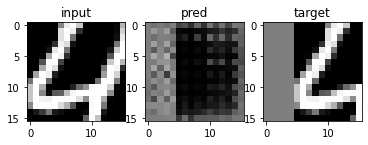

tf.Tensor(0.4936847, shape=(), dtype=float32)
epoch 2


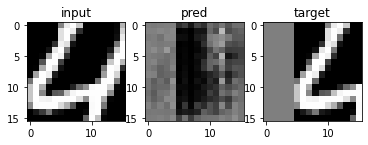

tf.Tensor(0.4372458, shape=(), dtype=float32)
epoch 3


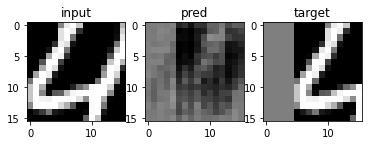

tf.Tensor(0.379784, shape=(), dtype=float32)
epoch 4


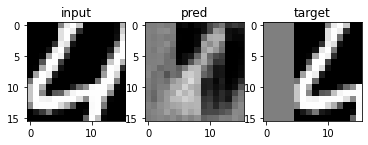

tf.Tensor(0.30800626, shape=(), dtype=float32)
epoch 5


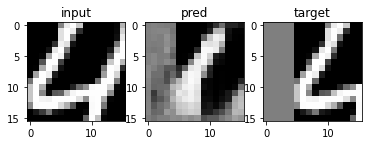

tf.Tensor(0.25397682, shape=(), dtype=float32)
epoch 6


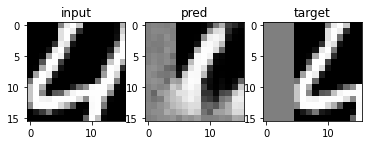

tf.Tensor(0.219042, shape=(), dtype=float32)
epoch 7


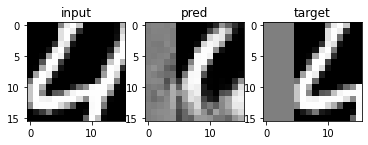

tf.Tensor(0.19087972, shape=(), dtype=float32)
epoch 8


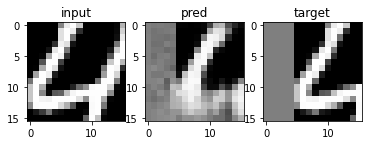

tf.Tensor(0.16693473, shape=(), dtype=float32)
epoch 9


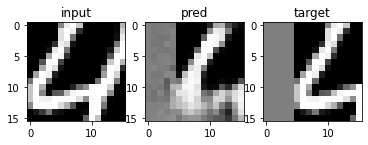

tf.Tensor(0.14479542, shape=(), dtype=float32)
epoch 10


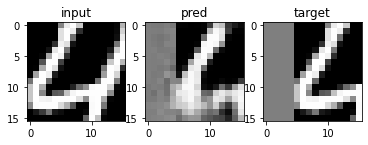

tf.Tensor(0.13057846, shape=(), dtype=float32)
epoch 11


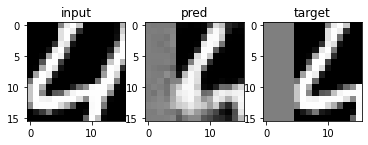

tf.Tensor(0.11869686, shape=(), dtype=float32)
epoch 12


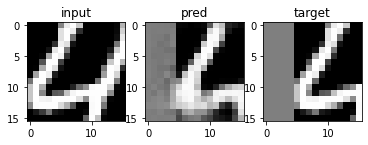

tf.Tensor(0.11127578, shape=(), dtype=float32)
epoch 13


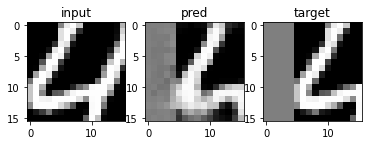

tf.Tensor(0.10125527, shape=(), dtype=float32)
epoch 14


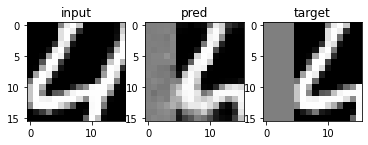

tf.Tensor(0.096340775, shape=(), dtype=float32)
epoch 15


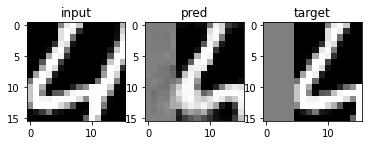

tf.Tensor(0.0892088, shape=(), dtype=float32)
epoch 16


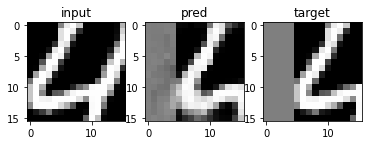

tf.Tensor(0.08638677, shape=(), dtype=float32)
epoch 17


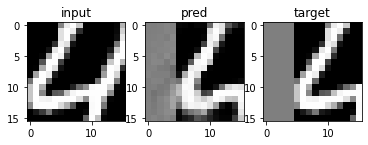

tf.Tensor(0.08096794, shape=(), dtype=float32)
epoch 18


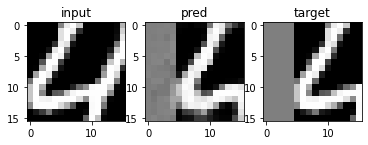

tf.Tensor(0.077865295, shape=(), dtype=float32)
epoch 19


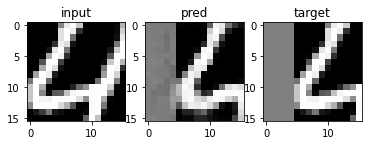

tf.Tensor(0.076887816, shape=(), dtype=float32)
epoch 20


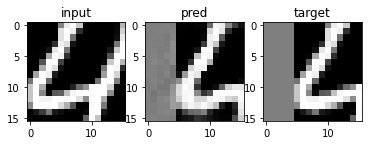

tf.Tensor(0.072968006, shape=(), dtype=float32)
epoch 21


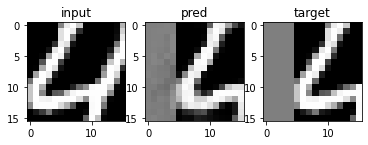

tf.Tensor(0.06874265, shape=(), dtype=float32)
epoch 22


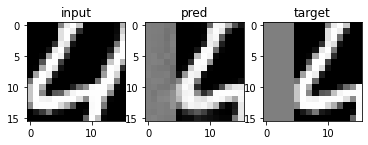

tf.Tensor(0.06788856, shape=(), dtype=float32)
epoch 23


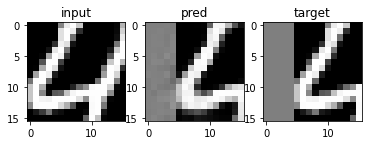

tf.Tensor(0.06311521, shape=(), dtype=float32)
epoch 24


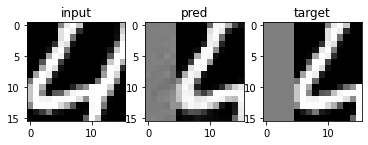

tf.Tensor(0.059992246, shape=(), dtype=float32)
epoch 25


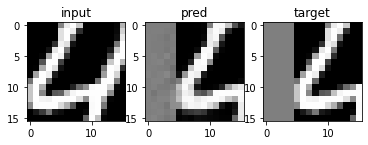

tf.Tensor(0.05958368, shape=(), dtype=float32)
epoch 26


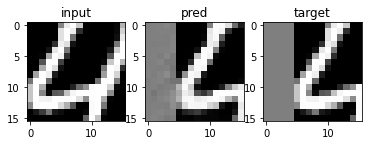

tf.Tensor(0.05563645, shape=(), dtype=float32)
epoch 27


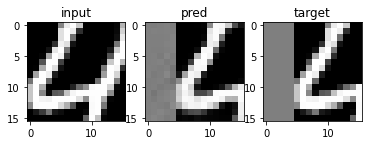

tf.Tensor(0.05453291, shape=(), dtype=float32)
epoch 28


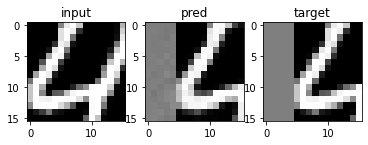

tf.Tensor(0.052390363, shape=(), dtype=float32)
epoch 29


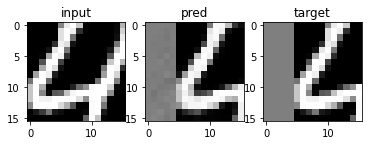

tf.Tensor(0.052012518, shape=(), dtype=float32)
epoch 30


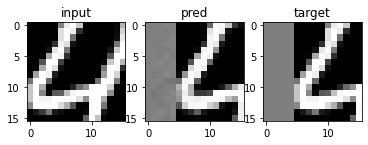

tf.Tensor(0.05167219, shape=(), dtype=float32)
epoch 31


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [129]:
train_step(50)

In [135]:
def seq(lyrs):
  return [tf.keras.models.Sequential(lyr) for lyr in lyrs]
import tensorflow as tf
def model_autoencoder():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = seq([tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#16
                                tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2D(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(512, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2DTranspose(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2DTranspose(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2DTranspose(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2DTranspose(1, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.tanh ) #16
          ])
  prev = inp
  skips = []
  for layer in layers[:6]:
    prev = layer(prev)
    skips.append(prev)

  skips = skips[:5]
  for skip, layer in zip(reversed(skips), layers[6:]):
    prev = tf.keras.layers.concatenate([skip, prev])
    prev = layer(prev)




  return tf.keras.Model(inputs=inp, outputs=prev)

model = model_autoencoder()

          


In [136]:
def plot_model():
  return tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

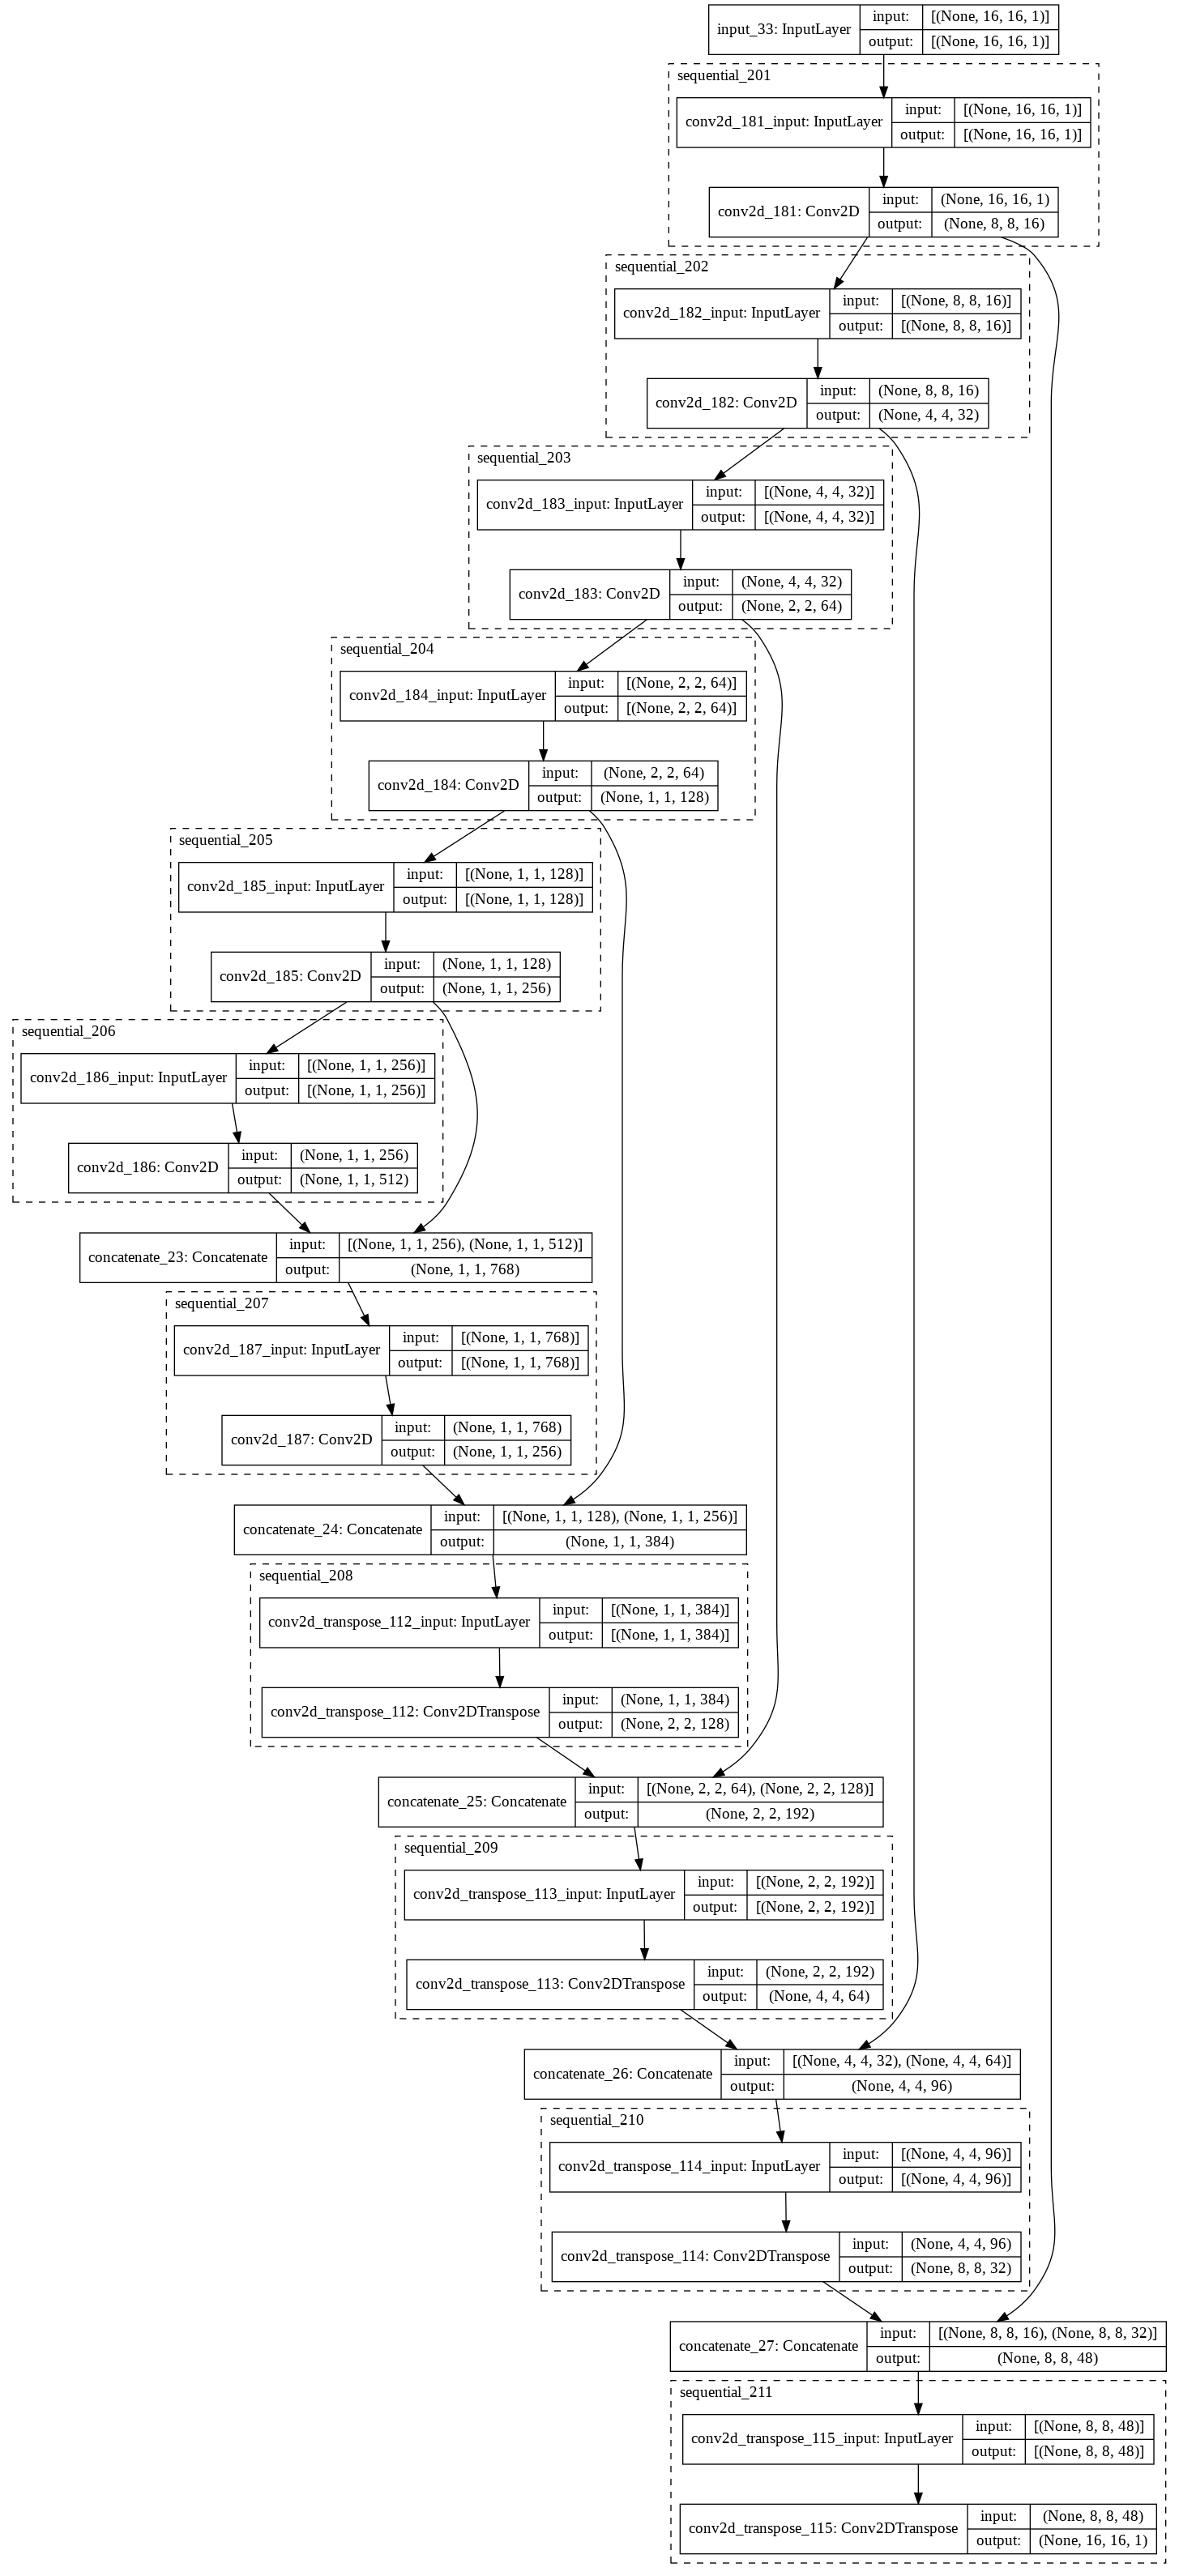

In [137]:
plot_model()

epoch 0


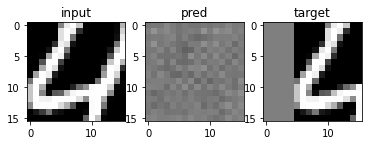

tf.Tensor(0.5979918, shape=(), dtype=float32)
epoch 1


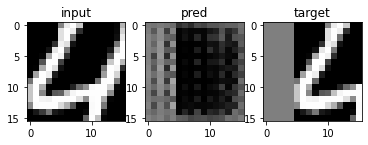

tf.Tensor(0.50194323, shape=(), dtype=float32)
epoch 2


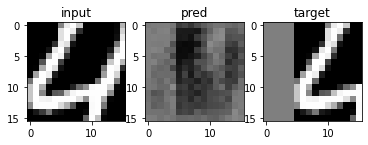

tf.Tensor(0.4322225, shape=(), dtype=float32)
epoch 3


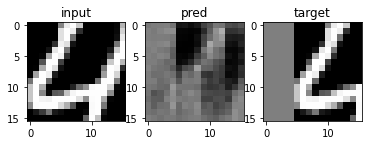

tf.Tensor(0.35389143, shape=(), dtype=float32)
epoch 4


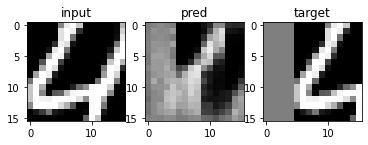

tf.Tensor(0.3061201, shape=(), dtype=float32)
epoch 5


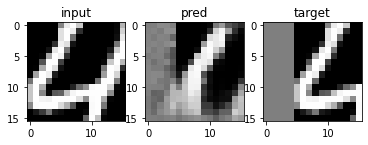

tf.Tensor(0.23779199, shape=(), dtype=float32)
epoch 6


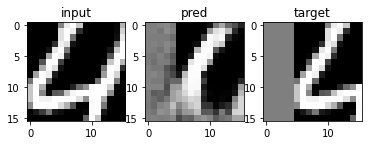

tf.Tensor(0.19950555, shape=(), dtype=float32)
epoch 7


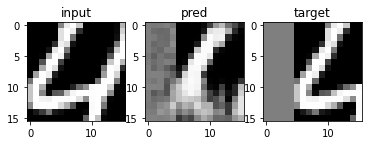

tf.Tensor(0.17424643, shape=(), dtype=float32)
epoch 8


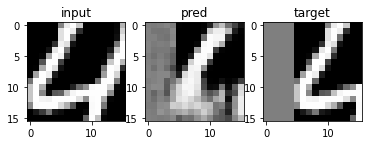

tf.Tensor(0.15143241, shape=(), dtype=float32)
epoch 9


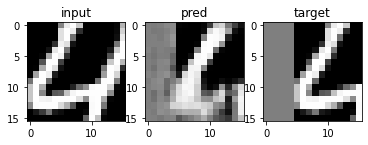

tf.Tensor(0.13952827, shape=(), dtype=float32)
epoch 10


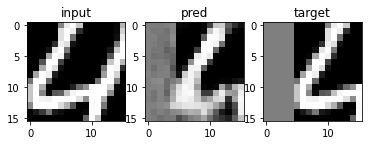

tf.Tensor(0.1264651, shape=(), dtype=float32)
epoch 11


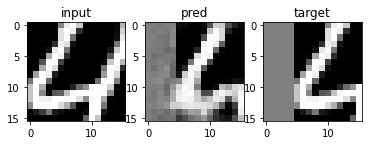

tf.Tensor(0.11400513, shape=(), dtype=float32)
epoch 12


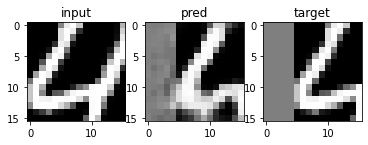

tf.Tensor(0.10750821, shape=(), dtype=float32)
epoch 13


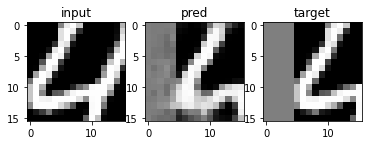

tf.Tensor(0.100174144, shape=(), dtype=float32)
epoch 14


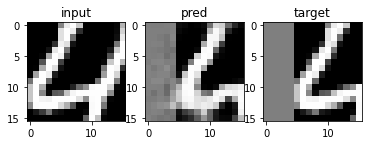

tf.Tensor(0.09165129, shape=(), dtype=float32)
epoch 15


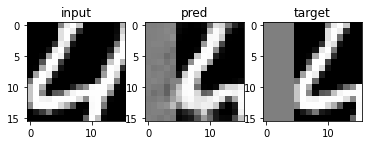

tf.Tensor(0.088617384, shape=(), dtype=float32)
epoch 16


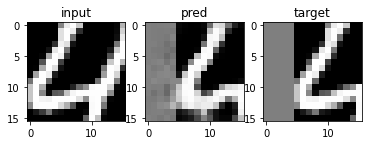

tf.Tensor(0.08204066, shape=(), dtype=float32)
epoch 17


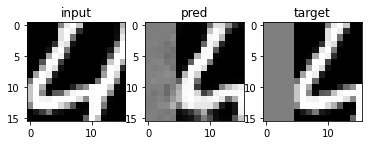

tf.Tensor(0.07728009, shape=(), dtype=float32)
epoch 18


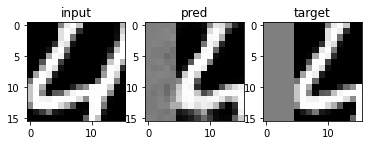

tf.Tensor(0.07435052, shape=(), dtype=float32)
epoch 19


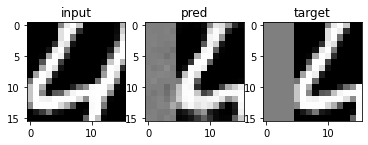

tf.Tensor(0.06959802, shape=(), dtype=float32)
epoch 20


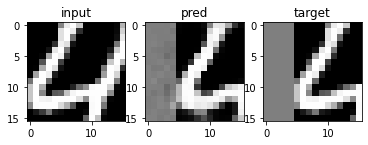

tf.Tensor(0.067008615, shape=(), dtype=float32)
epoch 21


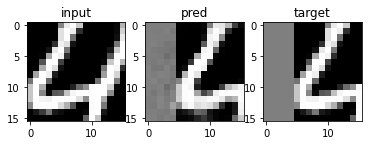

tf.Tensor(0.064677, shape=(), dtype=float32)
epoch 22


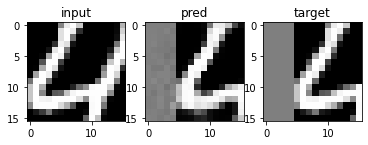

tf.Tensor(0.060700722, shape=(), dtype=float32)
epoch 23


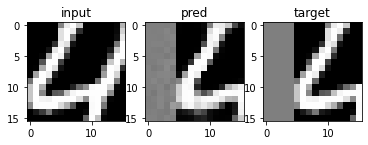

tf.Tensor(0.061708316, shape=(), dtype=float32)
epoch 24


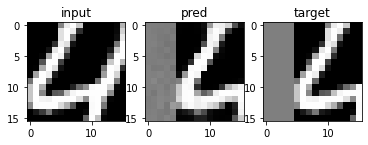

tf.Tensor(0.06180394, shape=(), dtype=float32)
epoch 25


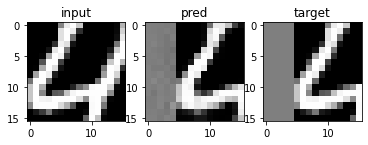

tf.Tensor(0.06245698, shape=(), dtype=float32)
epoch 26


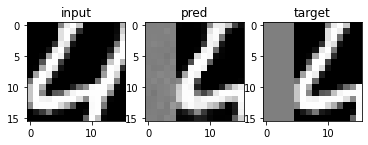

tf.Tensor(0.05810348, shape=(), dtype=float32)
epoch 27


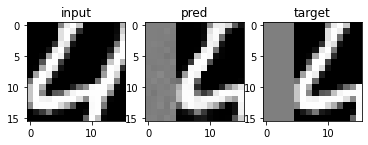

tf.Tensor(0.053153537, shape=(), dtype=float32)
epoch 28


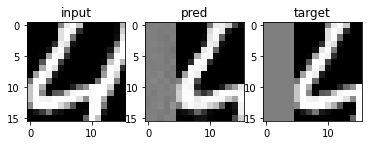

tf.Tensor(0.05281965, shape=(), dtype=float32)
epoch 29


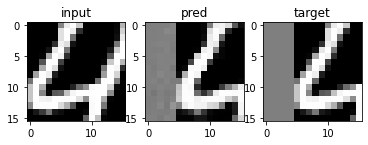

tf.Tensor(0.052857097, shape=(), dtype=float32)


KeyboardInterrupt: ignored

In [138]:
train_step(50)

In [139]:
def seq(lyrs):
  return [tf.keras.models.Sequential(lyr) for lyr in lyrs]
import tensorflow as tf
def model_autoencoder():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = seq([tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#16
                                tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2D(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(512, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2D(256, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2DTranspose(128, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2DTranspose(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2DTranspose(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2DTranspose(1, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.tanh ) #16
          ])
  prev = inp
  skips = []
  for layer in layers[:7]:
    prev = layer(prev)
    skips.append(prev)

  skips = skips[:4]
  for skip, layer in zip(reversed(skips), layers[7:]):
    prev = tf.keras.layers.concatenate([skip, prev])
    prev = layer(prev)




  return tf.keras.Model(inputs=inp, outputs=prev)

model = model_autoencoder()

          


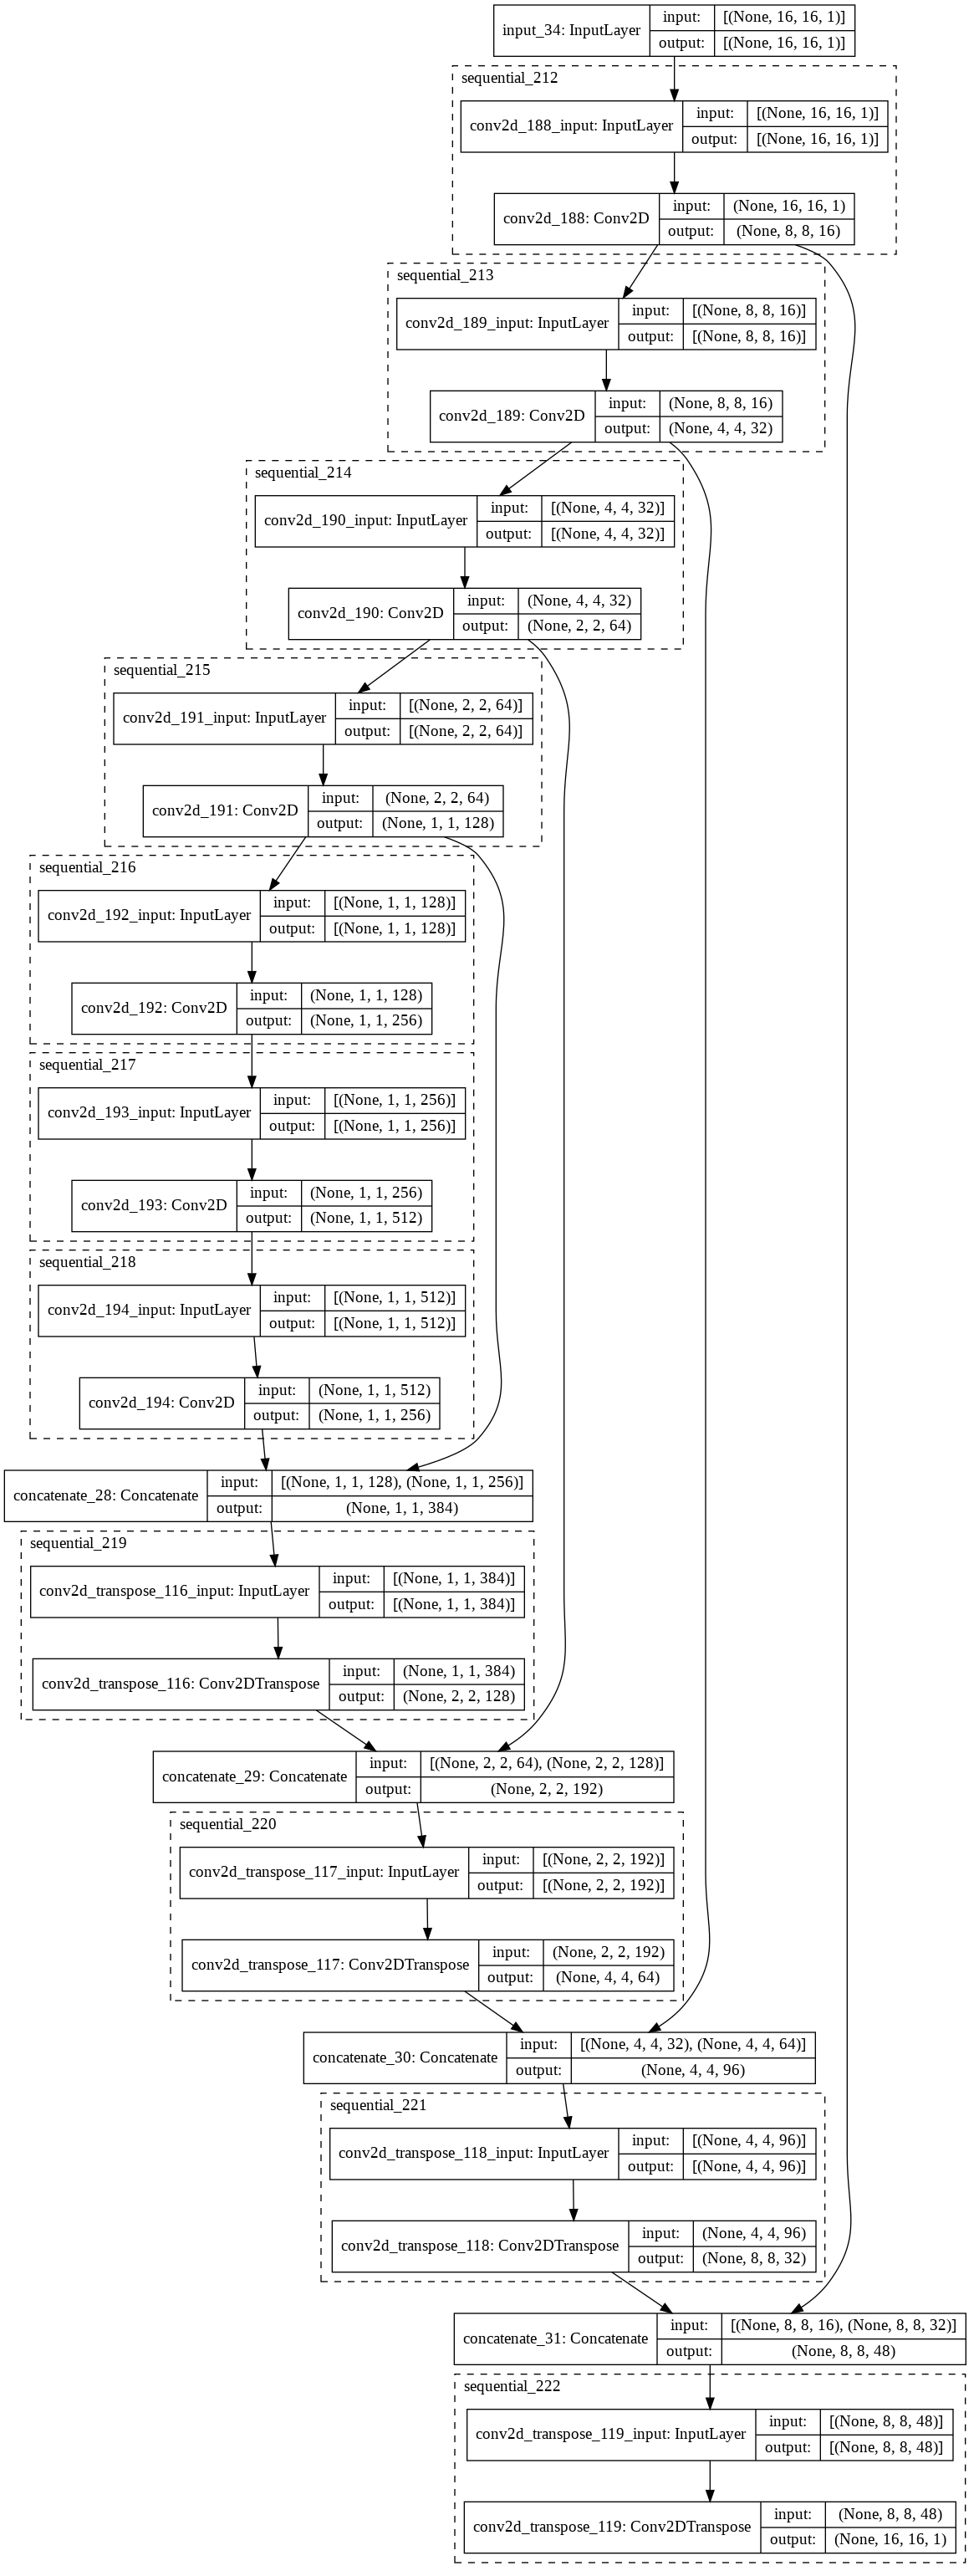

In [140]:
plot_model()

epoch 0


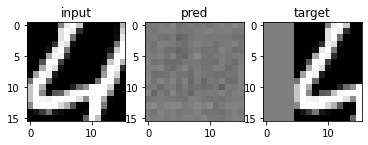

tf.Tensor(0.5882264, shape=(), dtype=float32)
epoch 1


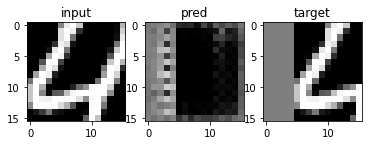

tf.Tensor(0.5107096, shape=(), dtype=float32)
epoch 2


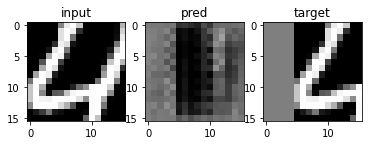

tf.Tensor(0.45436904, shape=(), dtype=float32)
epoch 3


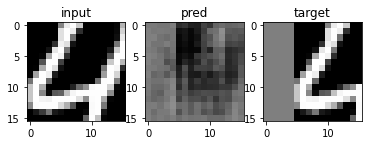

tf.Tensor(0.4133242, shape=(), dtype=float32)
epoch 4


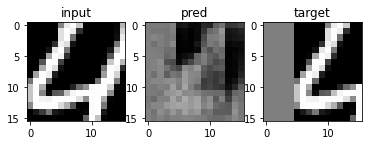

tf.Tensor(0.3421967, shape=(), dtype=float32)
epoch 5


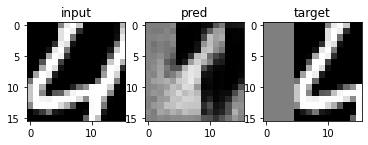

tf.Tensor(0.28183162, shape=(), dtype=float32)
epoch 6


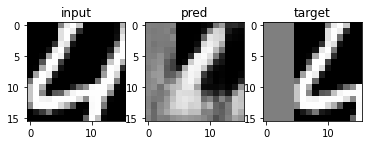

tf.Tensor(0.22867866, shape=(), dtype=float32)
epoch 7


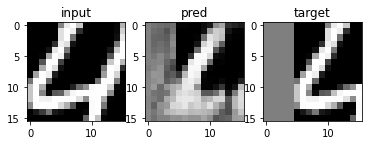

tf.Tensor(0.1881063, shape=(), dtype=float32)
epoch 8


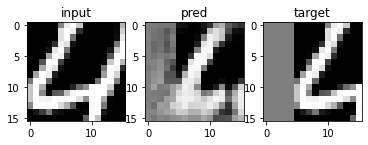

tf.Tensor(0.16764927, shape=(), dtype=float32)
epoch 9


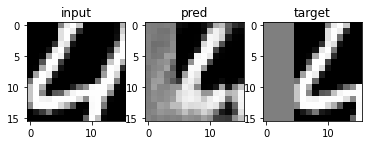

tf.Tensor(0.14470017, shape=(), dtype=float32)
epoch 10


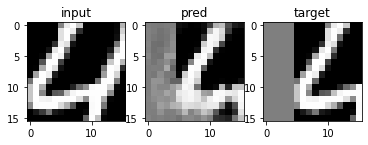

tf.Tensor(0.12803966, shape=(), dtype=float32)
epoch 11


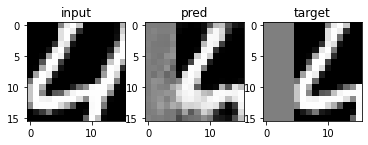

tf.Tensor(0.116283745, shape=(), dtype=float32)
epoch 12


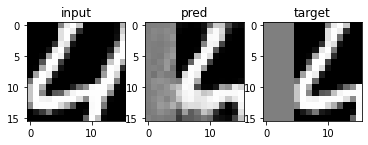

tf.Tensor(0.10637891, shape=(), dtype=float32)
epoch 13


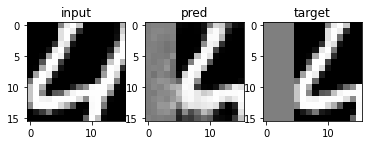

tf.Tensor(0.09811065, shape=(), dtype=float32)
epoch 14


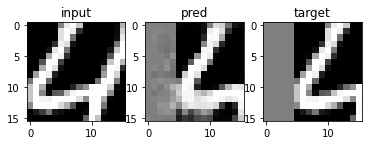

tf.Tensor(0.09225151, shape=(), dtype=float32)
epoch 15


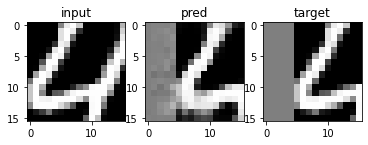

tf.Tensor(0.08766101, shape=(), dtype=float32)
epoch 16


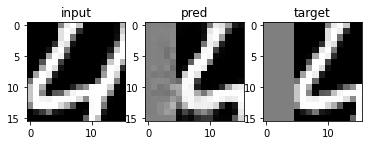

tf.Tensor(0.08172188, shape=(), dtype=float32)
epoch 17


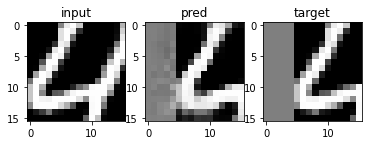

tf.Tensor(0.077891275, shape=(), dtype=float32)
epoch 18


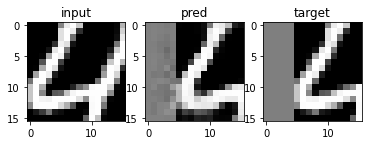

tf.Tensor(0.07316191, shape=(), dtype=float32)
epoch 19


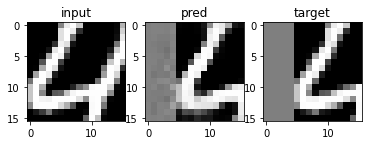

tf.Tensor(0.068819314, shape=(), dtype=float32)
epoch 20


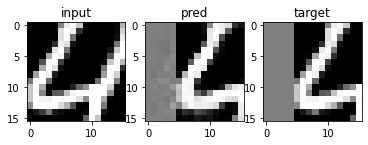

tf.Tensor(0.06714912, shape=(), dtype=float32)
epoch 21


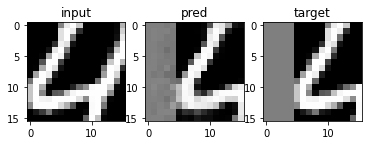

tf.Tensor(0.065778494, shape=(), dtype=float32)
epoch 22


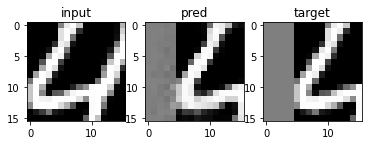

tf.Tensor(0.06177208, shape=(), dtype=float32)
epoch 23


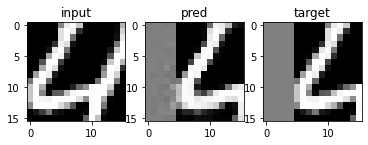

tf.Tensor(0.058975764, shape=(), dtype=float32)
epoch 24


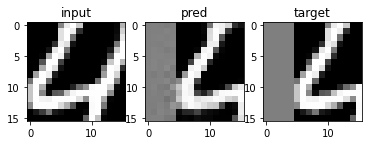

tf.Tensor(0.059633255, shape=(), dtype=float32)
epoch 25


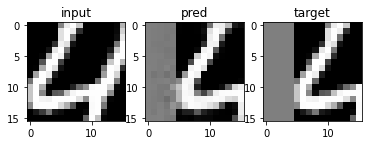

tf.Tensor(0.056165498, shape=(), dtype=float32)
epoch 26


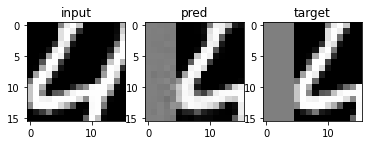

tf.Tensor(0.053538296, shape=(), dtype=float32)
epoch 27


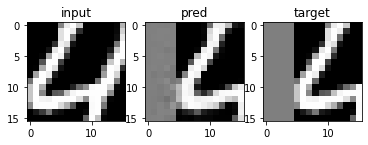

tf.Tensor(0.052976593, shape=(), dtype=float32)
epoch 28


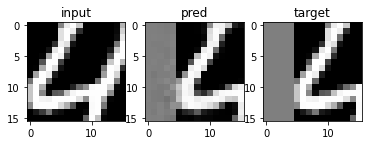

tf.Tensor(0.05015689, shape=(), dtype=float32)
epoch 29


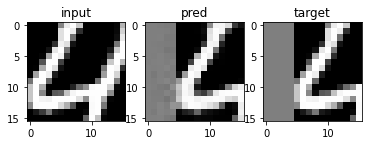

tf.Tensor(0.04975127, shape=(), dtype=float32)


In [141]:
#28: 0.052~
train_step(30)

In [ ]:
#28:  ~.05


In [168]:
def seq(lyrs):
  return [tf.keras.models.Sequential(lyr) for lyr in lyrs]
import tensorflow as tf
def model_autoencoder():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = seq([tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2D(512, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#1
                                tf.keras.layers.Conv2DTranspose(64, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
                                tf.keras.layers.Conv2DTranspose(32, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
                                tf.keras.layers.Conv2DTranspose(16, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
                                tf.keras.layers.Conv2DTranspose(1, kernel_size=(4,4), strides=2, padding="same", activation=tf.nn.tanh ) #16
          ])
  prev = inp
  skips = []
  for layer in layers[:4]:
    prev = layer(prev)
    skips.append(prev)

  skips = skips[:3]
  for skip, layer in zip(reversed(skips), layers[4:]):
    prev = layer(prev)
    prev = tf.keras.layers.concatenate([skip, prev])


  prev = layers[-1](prev)


  return tf.keras.Model(inputs=inp, outputs=prev)

model = model_autoencoder()

          


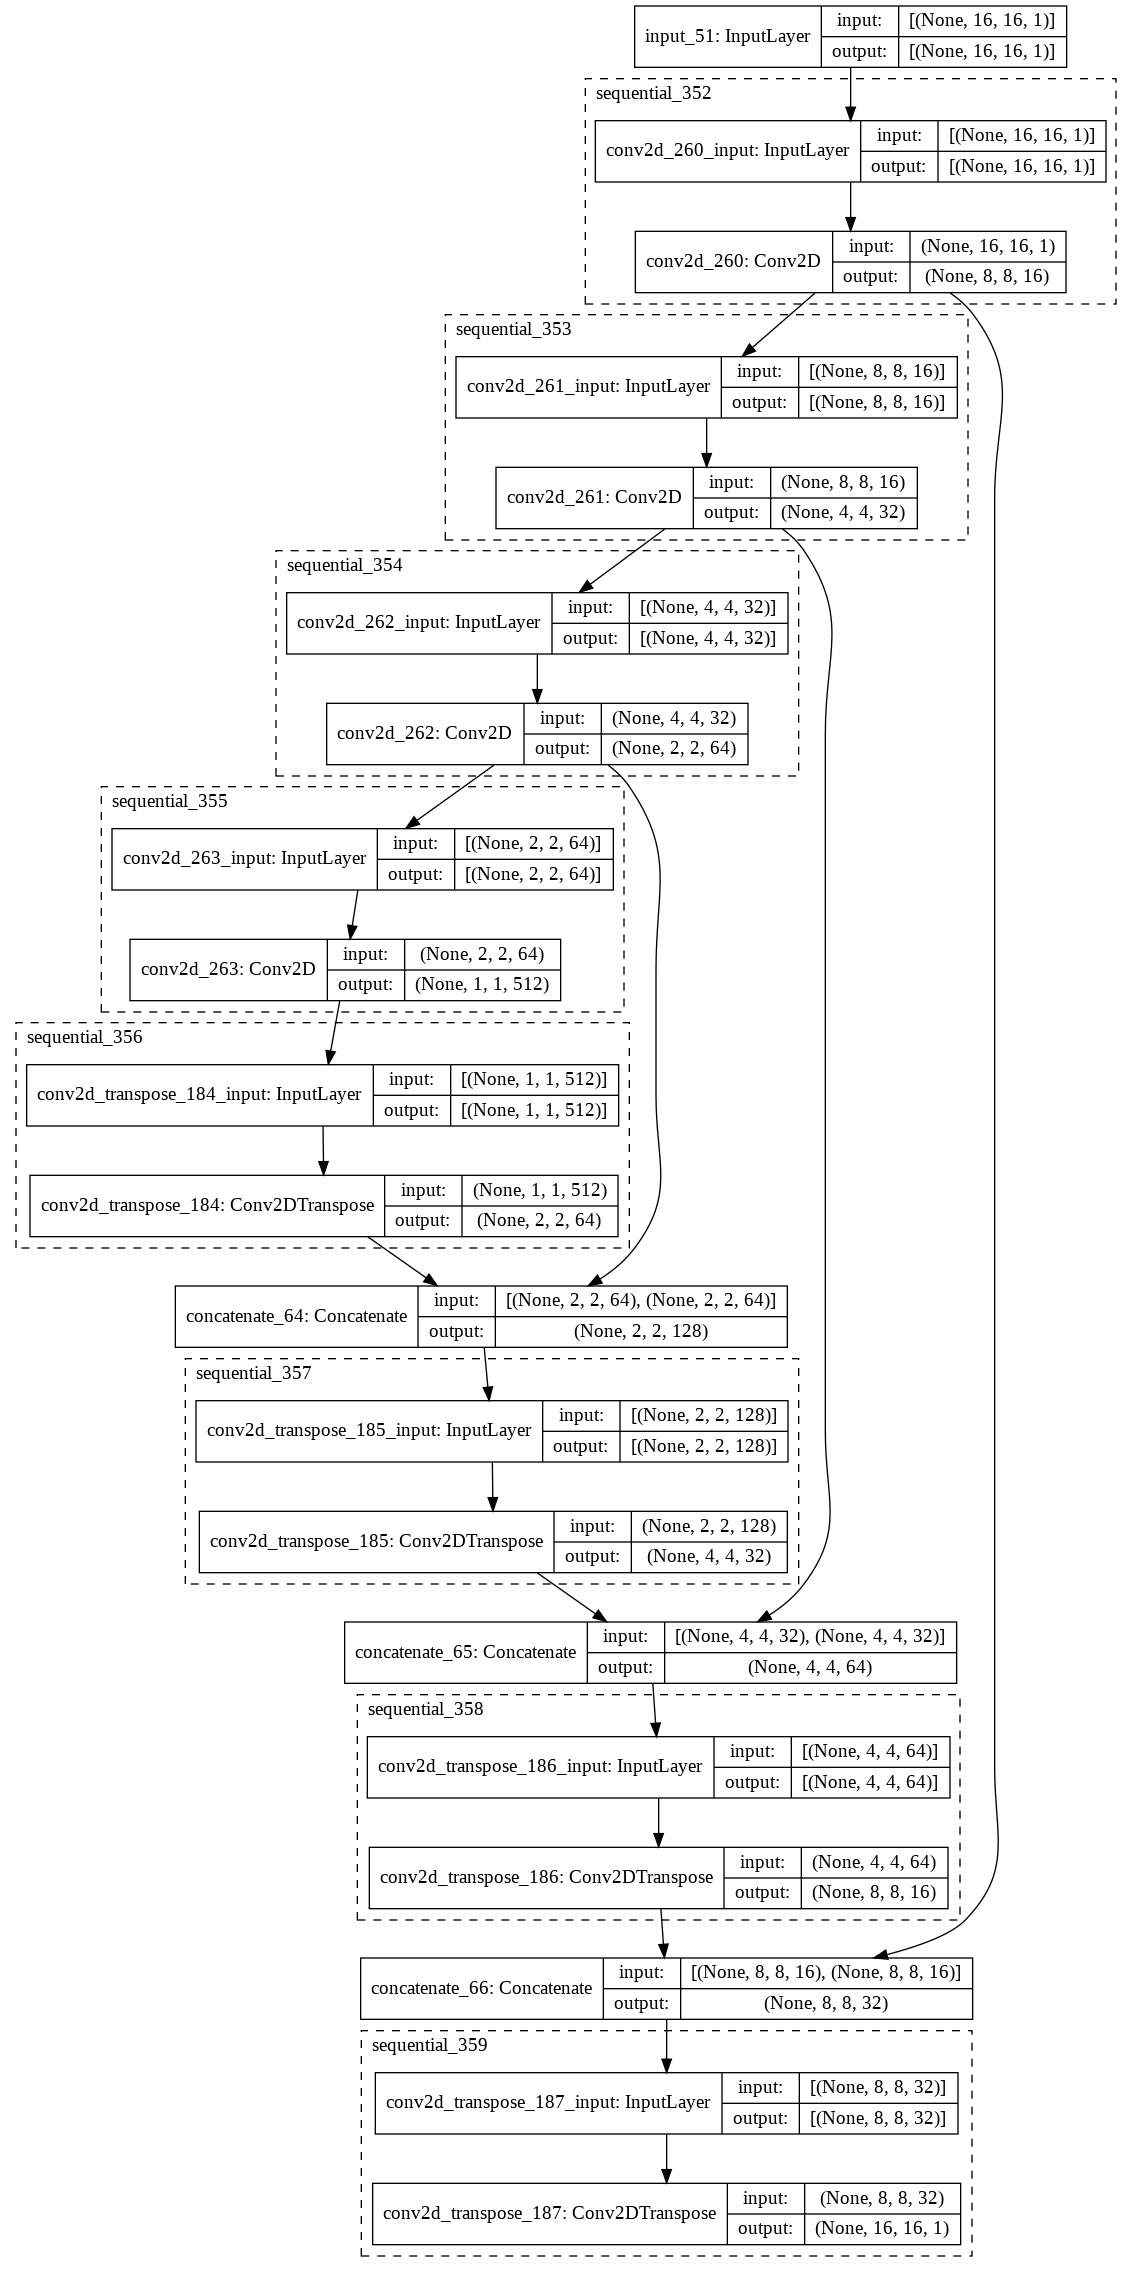

In [169]:
plot_model()

epoch 0


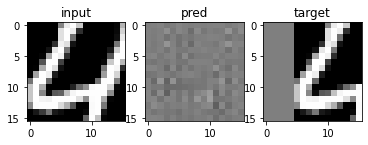

tf.Tensor(0.6018921, shape=(), dtype=float32)
epoch 1


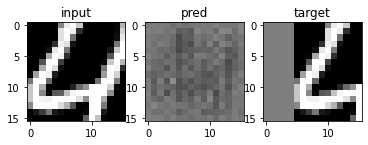

tf.Tensor(0.5628916, shape=(), dtype=float32)
epoch 2


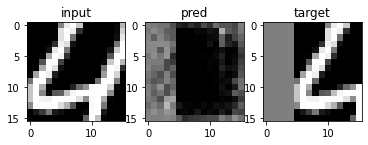

tf.Tensor(0.49120492, shape=(), dtype=float32)
epoch 3


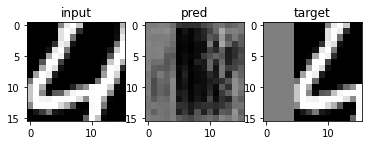

tf.Tensor(0.44822374, shape=(), dtype=float32)
epoch 4


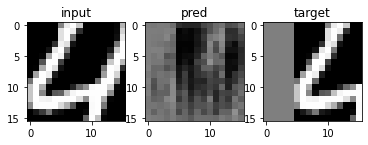

tf.Tensor(0.39707652, shape=(), dtype=float32)
epoch 5


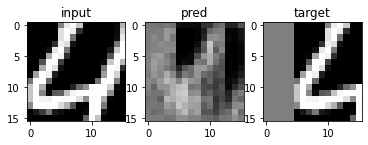

tf.Tensor(0.32116583, shape=(), dtype=float32)
epoch 6


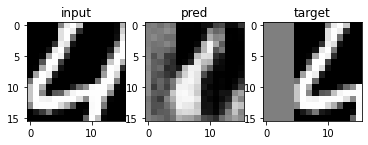

tf.Tensor(0.27573866, shape=(), dtype=float32)
epoch 7


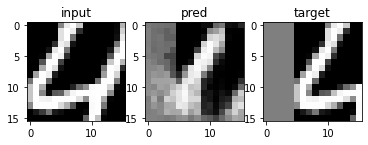

tf.Tensor(0.24551478, shape=(), dtype=float32)
epoch 8


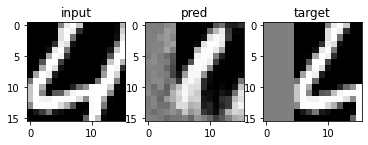

tf.Tensor(0.20954438, shape=(), dtype=float32)
epoch 9


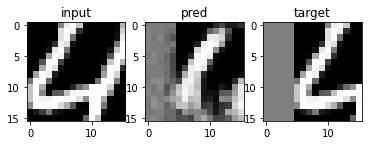

tf.Tensor(0.1791734, shape=(), dtype=float32)
epoch 10


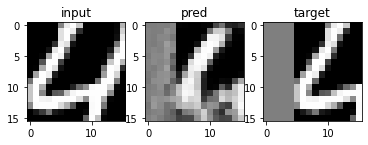

tf.Tensor(0.16229278, shape=(), dtype=float32)
epoch 11


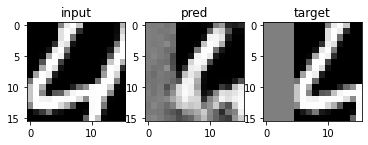

tf.Tensor(0.1458775, shape=(), dtype=float32)
epoch 12


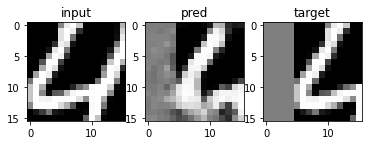

tf.Tensor(0.13302037, shape=(), dtype=float32)
epoch 13


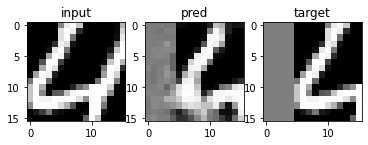

tf.Tensor(0.12086191, shape=(), dtype=float32)
epoch 14


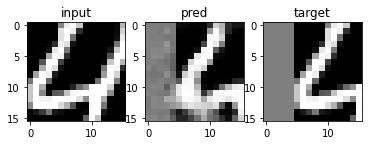

tf.Tensor(0.111986876, shape=(), dtype=float32)
epoch 15


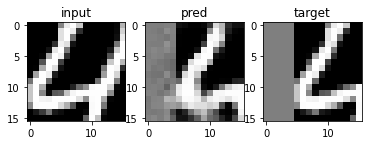

tf.Tensor(0.10609129, shape=(), dtype=float32)
epoch 16


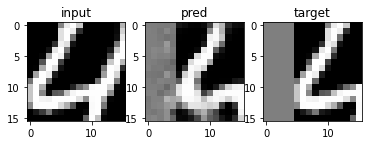

tf.Tensor(0.09855017, shape=(), dtype=float32)
epoch 17


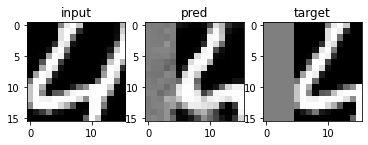

tf.Tensor(0.092991434, shape=(), dtype=float32)
epoch 18


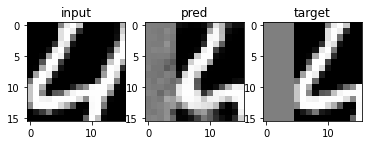

tf.Tensor(0.08820476, shape=(), dtype=float32)
epoch 19


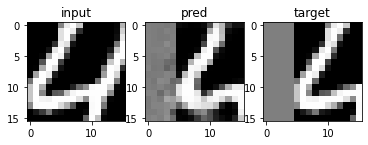

tf.Tensor(0.08301084, shape=(), dtype=float32)
epoch 20


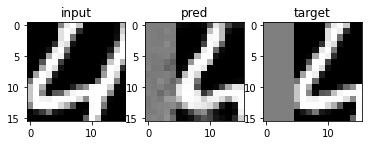

tf.Tensor(0.07943079, shape=(), dtype=float32)
epoch 21


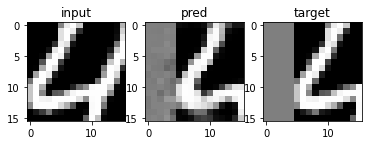

tf.Tensor(0.07590783, shape=(), dtype=float32)
epoch 22


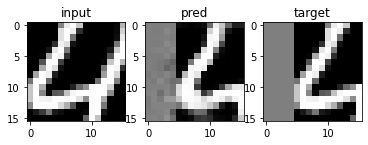

tf.Tensor(0.07234645, shape=(), dtype=float32)
epoch 23


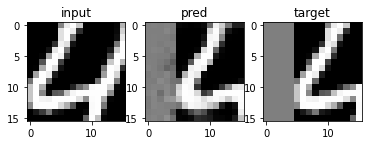

tf.Tensor(0.06916668, shape=(), dtype=float32)
epoch 24


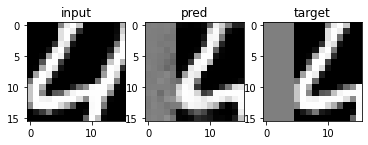

tf.Tensor(0.06879006, shape=(), dtype=float32)
epoch 25


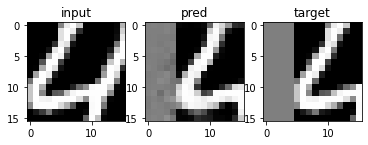

tf.Tensor(0.06399304, shape=(), dtype=float32)
epoch 26


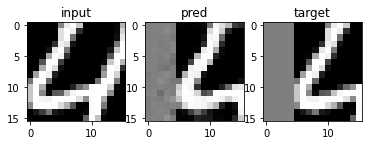

tf.Tensor(0.06470099, shape=(), dtype=float32)
epoch 27


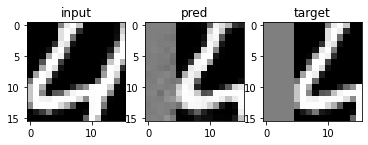

tf.Tensor(0.061362043, shape=(), dtype=float32)
epoch 28


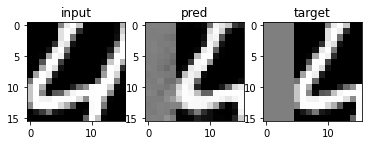

tf.Tensor(0.060530953, shape=(), dtype=float32)
epoch 29


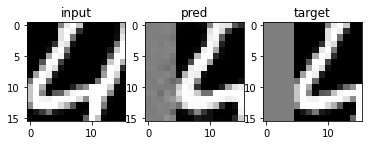

tf.Tensor(0.060614876, shape=(), dtype=float32)


In [170]:
train_step(30)

In [174]:
import tensorflow as tf
def model2():
  inp = tf.keras.layers.Input([16,16, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 16*16*1]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu"),
            tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#2
            tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#4
            tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#8
            tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2,2), strides=2, padding="same", activation=tf.nn.leaky_relu),#16

            
            #tf.keras.layers.Conv2D(filters=1024, kernel_size=(4,4), padding="same", activation=tf.nn.leaky_relu),
          #tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(16), strides=(16, 16), padding="same", activation=tf.nn.tanh, use_bias=False),
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = model2()
          


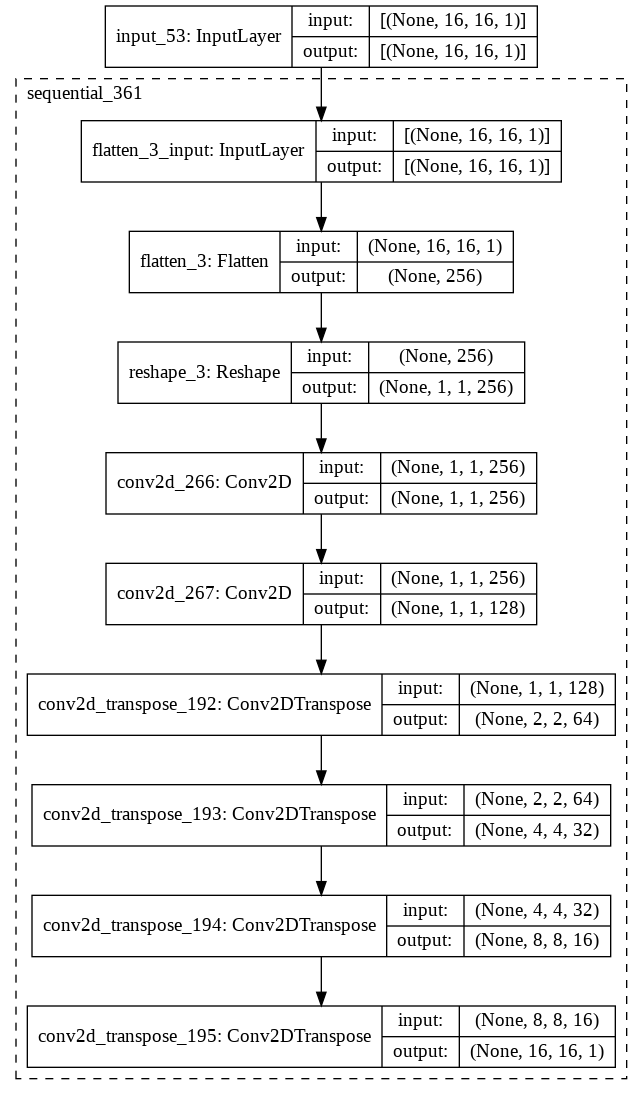

In [175]:
plot_model()

epoch 0


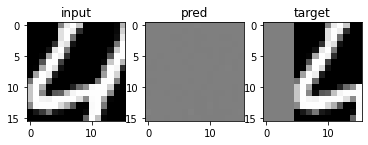

tf.Tensor(0.59600616, shape=(), dtype=float32)
epoch 1


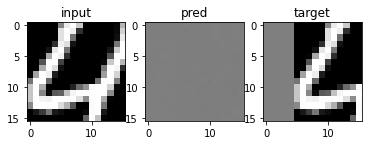

tf.Tensor(0.5932615, shape=(), dtype=float32)
epoch 2


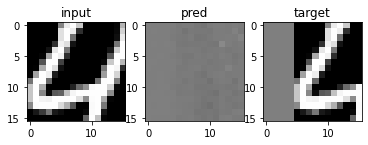

tf.Tensor(0.56820154, shape=(), dtype=float32)
epoch 3


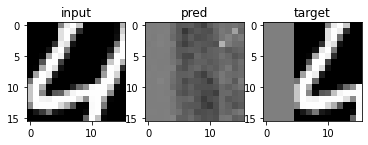

tf.Tensor(0.5010853, shape=(), dtype=float32)
epoch 4


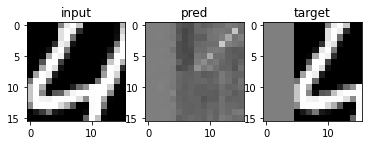

tf.Tensor(0.46384442, shape=(), dtype=float32)
epoch 5


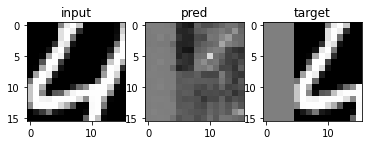

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.43455064, shape=(), dtype=float32)
epoch 6


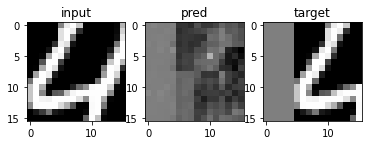

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.40152913, shape=(), dtype=float32)
epoch 7


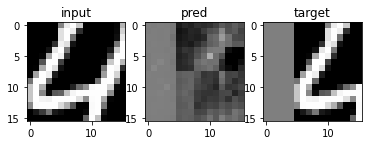

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.37604263, shape=(), dtype=float32)
epoch 8


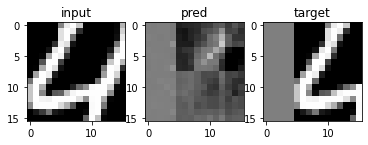

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.35573918, shape=(), dtype=float32)
epoch 9


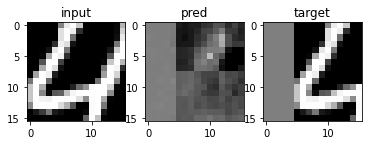

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.33701175, shape=(), dtype=float32)
epoch 10


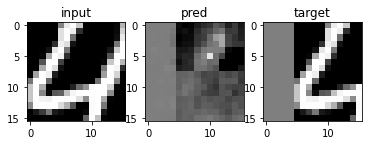

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.32316613, shape=(), dtype=float32)
epoch 11


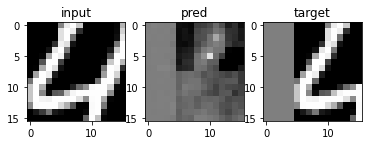

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.3028918, shape=(), dtype=float32)
epoch 12


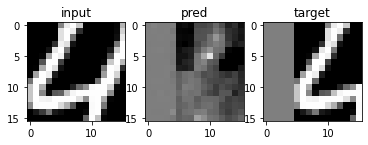

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.2884202, shape=(), dtype=float32)
epoch 13


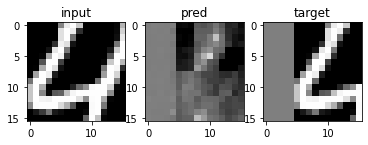

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.27784958, shape=(), dtype=float32)
epoch 14


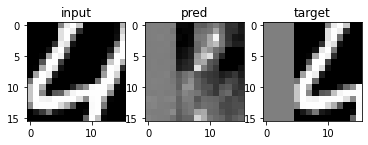

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.26625973, shape=(), dtype=float32)
epoch 15


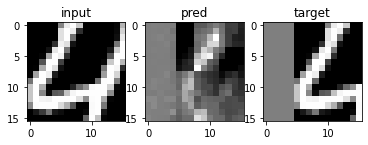

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.26374465, shape=(), dtype=float32)
epoch 16


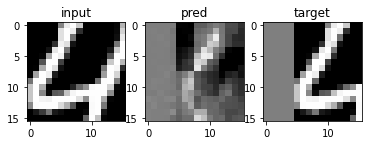

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.2516709, shape=(), dtype=float32)
epoch 17


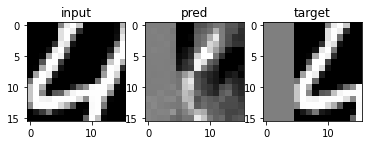

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.24357429, shape=(), dtype=float32)
epoch 18


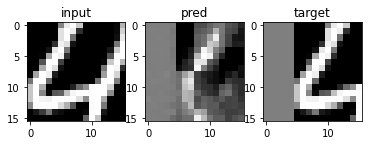

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.23372975, shape=(), dtype=float32)
epoch 19


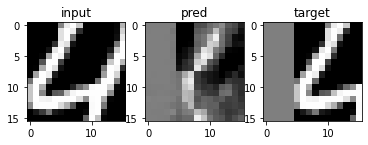

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.22669986, shape=(), dtype=float32)
epoch 20


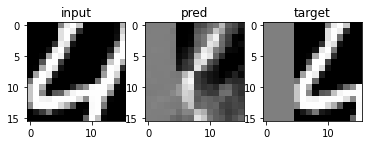

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.22280684, shape=(), dtype=float32)
epoch 21


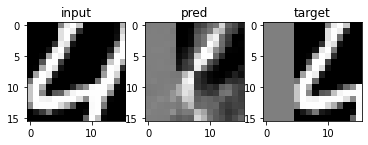

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.21692815, shape=(), dtype=float32)
epoch 22


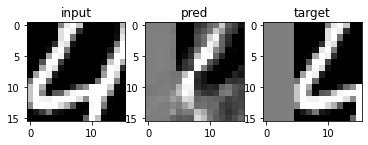

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.21303494, shape=(), dtype=float32)
epoch 23


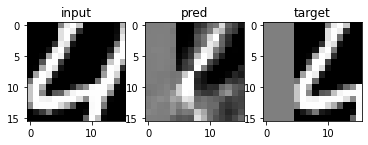

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.20675561, shape=(), dtype=float32)
epoch 24


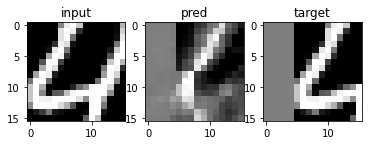

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.20417011, shape=(), dtype=float32)
epoch 25


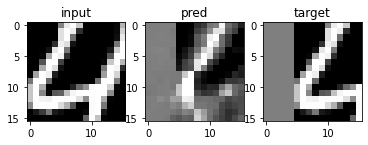

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.19730413, shape=(), dtype=float32)
epoch 26


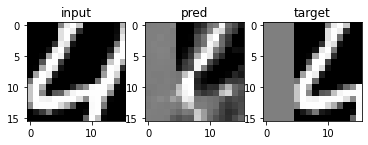

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.19488296, shape=(), dtype=float32)
epoch 27


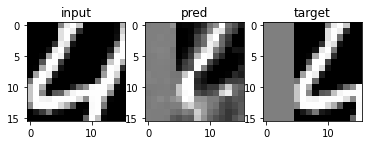

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.19216476, shape=(), dtype=float32)
epoch 28


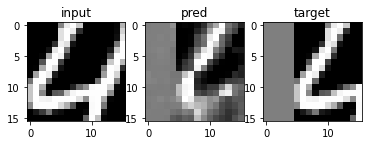

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0.18739715, shape=(), dtype=float32)
epoch 29


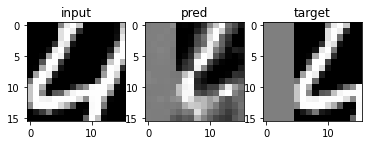

tf.Tensor(0.18497142, shape=(), dtype=float32)


In [176]:
train_step(30)

Conclusion: Bottleneck layers can be good.
They are even better with the consistency of leaky relus and residual connections.

There is no "shortcut" for image reconstruction.